<center><img src=https://c02.purpledshub.com/uploads/sites/41/2023/11/countries-in-the-world.jpg?w=1200></center>



<center><font size=6>Supervised Learning: Life Expectancy Prediction</font></center>

## Problem Statement

This project aims to identify the most important factors influencing life expectancy across countries by building a statistic linear regression model.  By analyzing global data from the World Health Organization (2000-2015 from 193 countries), the goal is to uncover actionable insights that can help policymakers prioritize interventions to improve public health.

## Variable Description

* Country: Name of the country.
* Year: Year of the analysis.
* Status: Status of the country (binary variable).
* Life expectancy: Life Expectancy in age
* Adult mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* Infant deaths: Number of Infant Deaths per 1000 population
* Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%).
* Measles: Reported number of measles cases per 1000 people.
* BMI: Average BMI of the entire population.
* Under-five deaths: Number of under-five deaths per 1000 people.
* Polio: Polio immunization coverage among 1-year-olds in percent (%).
* Total expenditure: general government expenditure on health as a percentage of total government expenditure (%).
* Diphtheria: Diphtheria immunization coverage among 1-year-olds in percent (%).
* HIV/AIDS: scaled deaths per 1000 live births from HIV/AIDS.
* GDP: GDP of each country in USD.
* Population: total population of the country.
* Thinness 1-19 years: prevalence of thinness among children and adolescents for age 10 to 19 in percent.
* Thinness 5-9 years: prevalence of thinness among children for age 5 to 9 in percent.
* Income composition of resources: human development index (HDI) in terms of income composition of resources.
* Schooling: number of years in school on average.

Data Source: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

## Importing Necessary Libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To build linear regression model using statsmodels
import statsmodels.api as sm

# To compute variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
# Reading the dataset
data = pd.read_csv('/content/Life Expectancy Data.csv')

In [4]:
# Copying the original dataset
df = data.copy()

## Data Overview

In [5]:
# Checking the shape of the dataset.
print(f'There are {df.shape[0]} number of rows and {df.shape[1]} numner of columns.')

There are 2938 number of rows and 22 numner of columns.


In [6]:
# Displaying the first 5 rows of the dataset
df.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life expectancy,65.00000,59.90000,59.90000,59.50000,59.20000
Adult Mortality,263.00000,271.00000,268.00000,272.00000,275.00000
infant deaths,62,64,66,69,71
Alcohol,0.01000,0.01000,0.01000,0.01000,0.01000
percentage expenditure,71.27962,73.52358,73.21924,78.18422,7.09711
Hepatitis B,65.00000,62.00000,64.00000,67.00000,68.00000
Measles,1154,492,430,2787,3013


In [7]:
# Checking data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Observations:**

* All the features except for Country and Status are numeric variables.
* However, numeric variables may have categorical nature and need further analysis.
* Some variables seem to have missing values.
* The target variable is life expectancy.

In [8]:
# Checking the duplicated rows
df.duplicated().any()

np.False_

* No duplicated rows.

In [9]:
# Checking the missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


**Observations:**
* There are some missing values in multiple columns.
* Checking the distribution of the values may help to figure out how to deal with them.

In [10]:
# Creating list of columns with null values.
null = df.isnull().sum()
null_cols = []

for i in range(len(null)):
    if null[i] > 0:
        null_cols.append(null.index[i])

In [11]:
# Checking the data type of null columns.
df[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Adult Mortality                  2928 non-null   float64
 2   Alcohol                          2744 non-null   float64
 3   Hepatitis B                      2385 non-null   float64
 4    BMI                             2904 non-null   float64
 5   Polio                            2919 non-null   float64
 6   Total expenditure                2712 non-null   float64
 7   Diphtheria                       2919 non-null   float64
 8   GDP                              2490 non-null   float64
 9   Population                       2286 non-null   float64
 10   thinness  1-19 years            2904 non-null   float64
 11   thinness 5-9 years              2904 non-null   float64
 12  Income composition o

**Observations:**
* The data type of all the attributes in null_cols list are float.
* Let's find out the distribution of the variables using density plot.

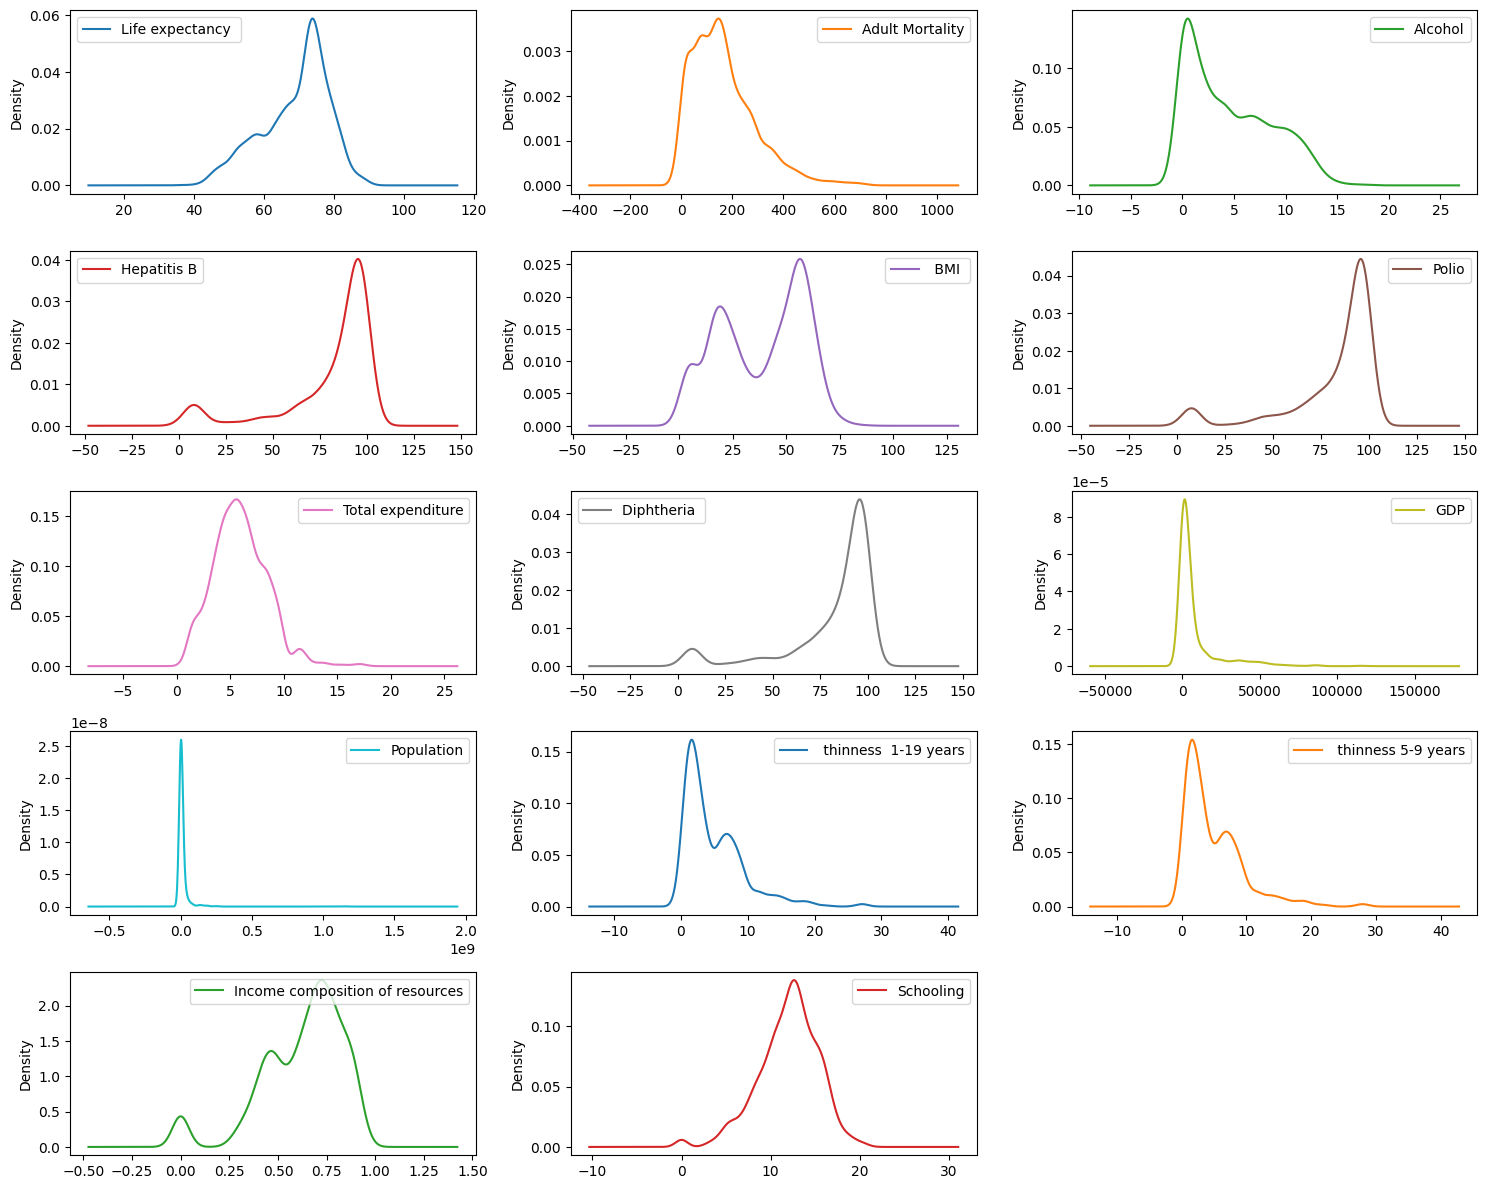

In [12]:
# Ceating density plot for columns with missing values.
df[null_cols].plot(kind = 'density', subplots = True, layout = (5, 3), sharex = False, sharey = False, figsize = (15, 12))
plt.tight_layout()
plt.show()

**Observations:**

* Judging by the shape of distribution along the varaibles (skewed), replacing missing values with median values will be appropriate.

In [13]:
# Function to replace missing values with median values
medianFiller = lambda x: x.fillna(x.median())

# Applying the function and checking the missing value in the columns
df[null_cols] = df[null_cols].apply(medianFiller)
df[null_cols].isnull().any()

,0
Life expectancy,False
Adult Mortality,False
Alcohol,False
Hepatitis B,False
BMI,False
Polio,False
Total expenditure,False
Diphtheria,False
GDP,False
Population,False


In [14]:
df.isnull().any()

,0
Country,False
Year,False
Status,False
Life expectancy,False
Adult Mortality,False
infant deaths,False
Alcohol,False
percentage expenditure,False
Hepatitis B,False
Measles,False


**Observations:**

* All the missing values are successfully imputed with median values.
* Some of the column names need to be appropraitely formated.

In [15]:
# Standardizing the space in column names to make clean column names
df.columns = df.columns.str.replace(r'\s+', ' ', regex = True).str.strip()

In [16]:
# Renaming the columns
df = df.rename(columns = {'Life expectancy': 'Life Expectancy', 'infant deaths': 'Infant Deaths', 'percentage expenditure': 'Percentage Expenditure',
                          'under-five deaths': 'Under Five Deaths', 'thinness 1-19 years': 'Thinness 1-19 Years', 'thinness 5-9 years': 'Thinness 5-9 Years',
                          'Income composition of resources': 'Income Composition of Resources', 'Total expenditure': 'Total Expenditure'})

In [17]:
# Checking the conversion
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling'],
      dtype='object')

* The column names are appropriately formatted.

In [18]:
# Statistical summary of the data
df.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
count,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000,2938.00000
mean,2007.51872,69.23472,164.72566,30.30395,4.54688,738.25130,83.02212,2419.59224,38.38118,42.03574,82.61777,5.92410,82.39312,1.74210,6611.52386,10230851.22820,4.82189,4.85214,0.63036,12.00984
std,4.61384,9.50912,124.08622,117.92650,3.92195,1987.91486,22.99698,11467.27249,19.93537,160.44555,23.36717,2.40077,23.65556,5.07778,13296.60345,54022417.45547,4.39762,4.48585,0.20514,3.26514
min,2000.00000,36.30000,1.00000,0.00000,0.01000,0.00000,1.00000,0.00000,1.00000,0.00000,3.00000,0.37000,2.00000,0.10000,1.68135,34.00000,0.10000,0.10000,0.00000,0.00000
25%,2004.00000,63.20000,74.00000,0.00000,1.09250,4.68534,82.00000,0.00000,19.40000,0.00000,78.00000,4.37000,78.00000,0.10000,580.48700,418917.25000,1.60000,1.60000,0.50425,10.30000
50%,2008.00000,72.10000,144.00000,3.00000,3.75500,64.91291,92.00000,17.00000,43.50000,4.00000,93.00000,5.75500,93.00000,0.10000,1766.94760,1386542.00000,3.30000,3.30000,0.67700,12.30000
75%,2012.00000,75.60000,227.00000,22.00000,7.39000,441.53414,96.00000,360.25000,56.10000,28.00000,97.00000,7.33000,97.00000,0.80000,4779.40519,4584371.25000,7.10000,7.20000,0.77200,14.10000
max,2015.00000,89.00000,723.00000,1800.00000,17.87000,19479.91161,99.00000,212183.00000,87.30000,2500.00000,99.00000,17.60000,99.00000,50.60000,119172.74180,1293859294.00000,27.70000,28.60000,0.94800,20.70000


**Observations:**
* The average life expectancy is 69.23 years, with a standard deviation of 9.51 years. The minimum life expectancy of 36.30 years indicate some regions have quite low life expectancy.

* The average adult mortality rate is 164.73 per 1,000 live births, highlighting the high mortality on populations. The high standard deviation of 124.09, aligns with the statistics of life expectancy. Both attributes imply the existence of regions with severe health challenges.

* The average GDP is approximately 6,611 dollars and standard deviation of 13,296 dollars suggest the financial discrepencies between regions. This aligns with the regions with the gap of life expectancy and adult mortality.

## Exploratory Data Analysis (EDA)

## Univariate Analysis

### Categorical Variables

**Country**

In [19]:
print(df['Country'].nunique())
print('-' * 30)
print(df['Country'].value_counts().sort_values(ascending = False).head(10))

193
------------------------------
Country
Afghanistan            16
Albania                16
Algeria                16
Angola                 16
Antigua and Barbuda    16
Argentina              16
Armenia                16
Australia              16
Austria                16
Azerbaijan             16
Name: count, dtype: int64


**Observations:**
* There are 193 countries in this dataset.
* It seems there are mutiple countries that has 16 counts of values in the variable.

In [20]:
country = df['Country'].value_counts()

countries_16 = []

for i in range(len(country)):
        if country[i] == 16:
            countries_16.append(country.index[i])

len(countries_16)

183

**Observations:**
* There are 183 countries that has 16 values in Country variable.
* This might lead to overfitting or make over-complex model, especially if there is limited data for each country.
* Therefore, country variable will be dropped.

**Status**

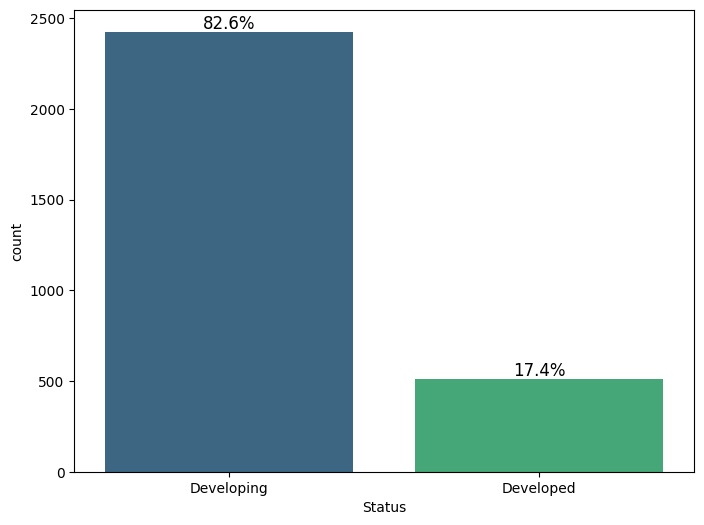

In [21]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(data = df, x = 'Status', order = df['Status'].value_counts().index[:], palette = 'viridis')

total = len(df['Status'])

for p in ax.patches:
      label = "{:.1f}%".format(100 * p.get_height() / total)
      x = p.get_x() + p.get_width()/2
      y = p.get_height()

      ax.annotate(label, (x, y), ha = 'center', va = 'center', xytext = (0, 6), size = 12,
                  textcoords = 'offset points')

plt.show()

**Observations:**

* The number of status for developing countries (82.6%) is approximately five times than that (17.4%) of developed countries.

* Let's check the number of countries in each class.

In [22]:
# Subsetting the dataset where the status of the country is developing
developing = df[df['Status'] == 'Developing']
# Subsetting the dataset where the status of the country is developed
developed = df[df['Status'] == 'Developed']

# The number of developing and developed countries in the dataset
num_developing = developing.loc[:, 'Country'].nunique()
num_developed = developed.loc[:, 'Country'].nunique()

print(f'The number of developing countries is {num_developing}.')
print(f'The number of developed countries is {num_developed}.')

The number of developing countries is 161.
The number of developed countries is 32.


**Year**

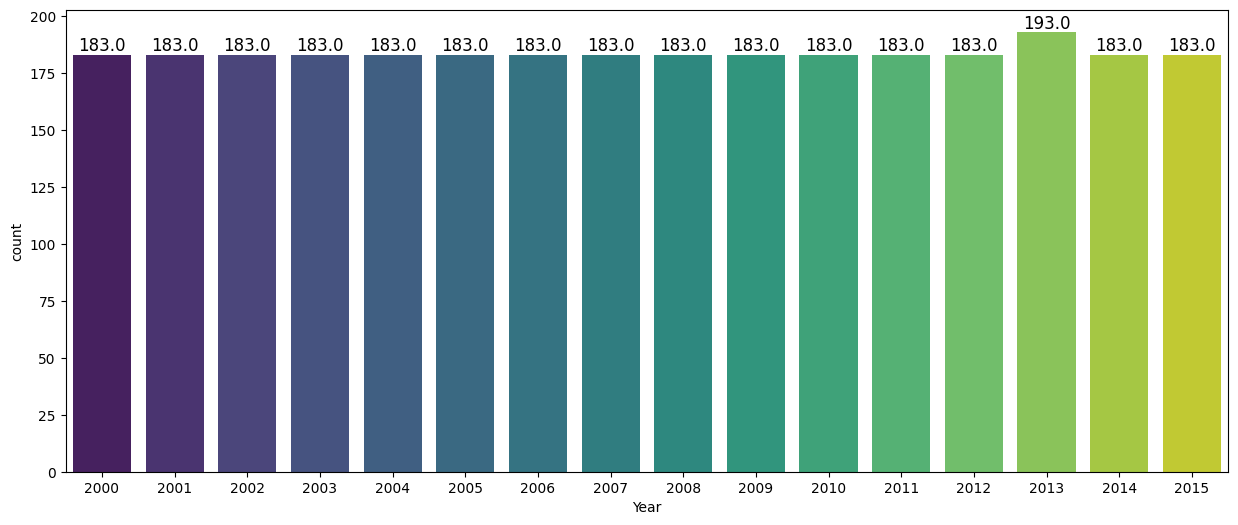

In [23]:
plt.figure(figsize = (15, 6))
ax = sns.countplot(data = df, x = 'Year', palette = 'viridis')
for p in ax.patches:
        label = p.get_height()
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(label, (x, y), ha = 'center', va = 'center', size = 12, xytext = (0, 6),
                    textcoords = 'offset points')

plt.show()

**Observations:**
* Although the data type of Year is integer, it has nature of categorical variable.
* Except for year 2013, all other years from 2000 to 2015 has the same number of values.
* The year does not need further analysis.

**Observations:**
* Two columns are successfully dropped.

### Numeric Variables

In [24]:
# Function to display numeric features into boxplot and histogram
def hist_boxplot(data, var, figsize = (10, 8)):
      fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, figsize = figsize,
                                            gridspec_kw = {'height_ratios': (0.25, 0.75)})

      # Plotting boxplot
      sns.boxplot(data = data, x = var, ax = ax_box, showmeans = True)

      # Plotting histogram
      sns.histplot(data = data, x = var, ax = ax_hist, kde = True)
      ax_hist.axvline(data[var].median(), color = 'black', label = 'Median')
      ax_hist.axvline(data[var].mean(), color = 'red', label = 'Mean')

      plt.tight_layout()
      plt.legend()
      plt.show()

**Life Expectancy**

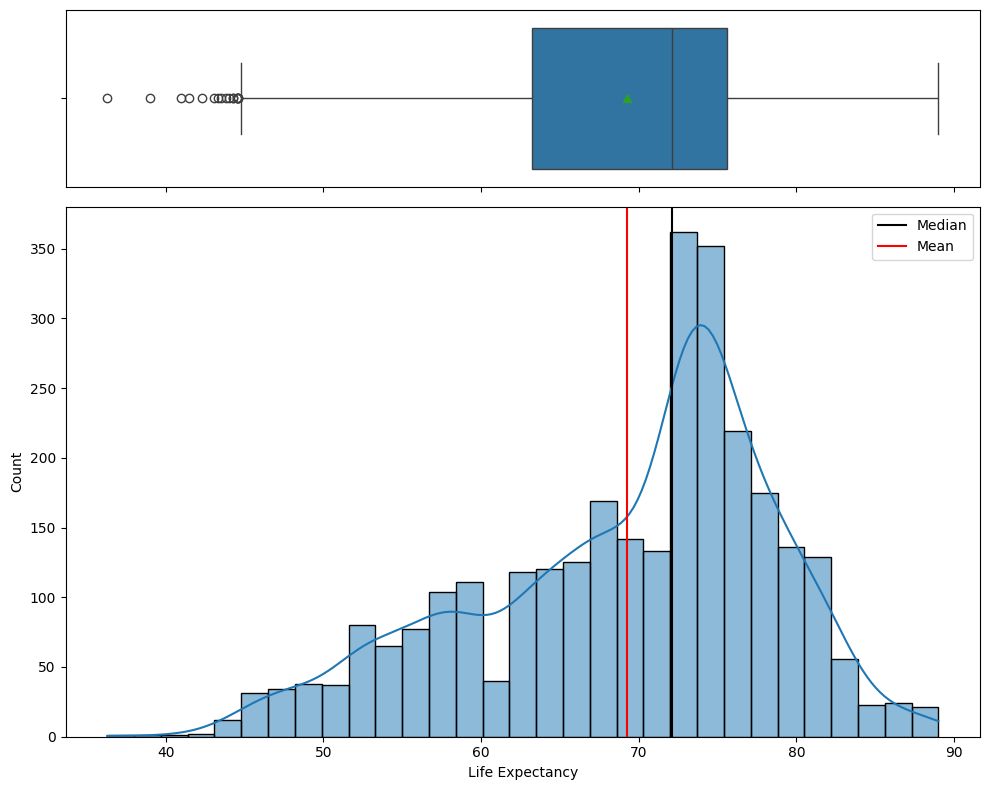

In [25]:
# Histogram and Boxplot for Life expectancy
hist_boxplot(df, 'Life Expectancy')

**Observations:**
* The plots show left-skewness on life expectancy and very small number of people have life expectancy under 45.



**Adult Mortality**

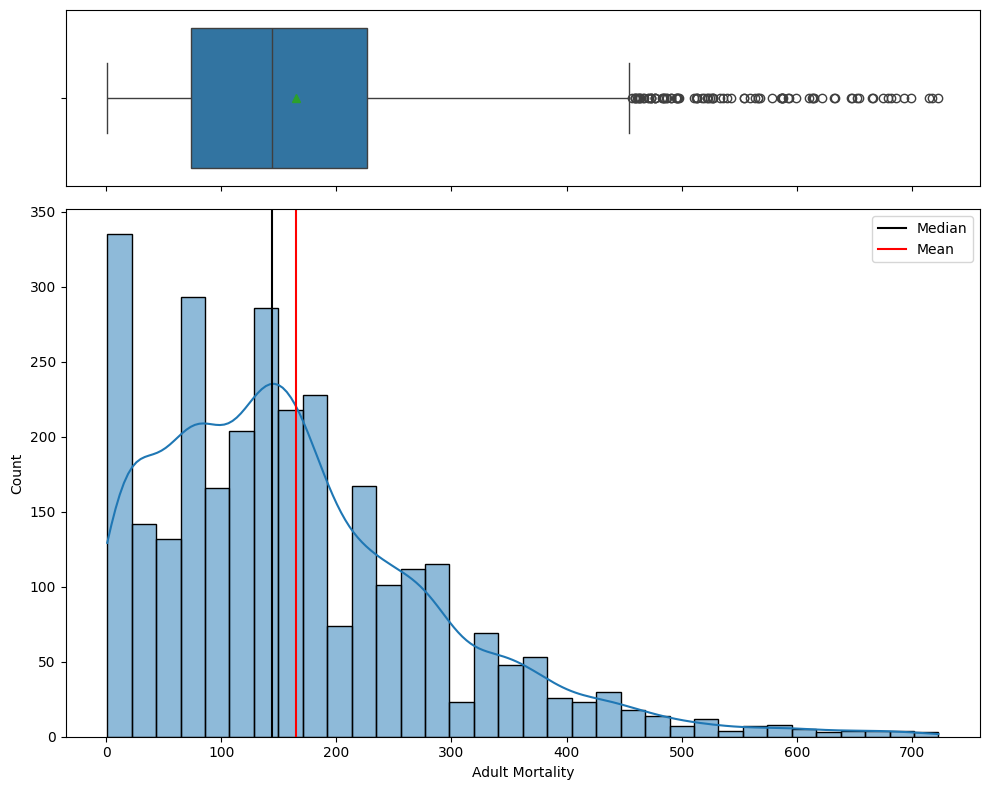

In [26]:
# Histogram and Boxplot for Adult Mortality
hist_boxplot(df, 'Adult Mortality')

**Observations:**
* The plots show right-skewness on adult mortality and numerous number of deaths over 450 per 1000 people.



**Infant Deaths**

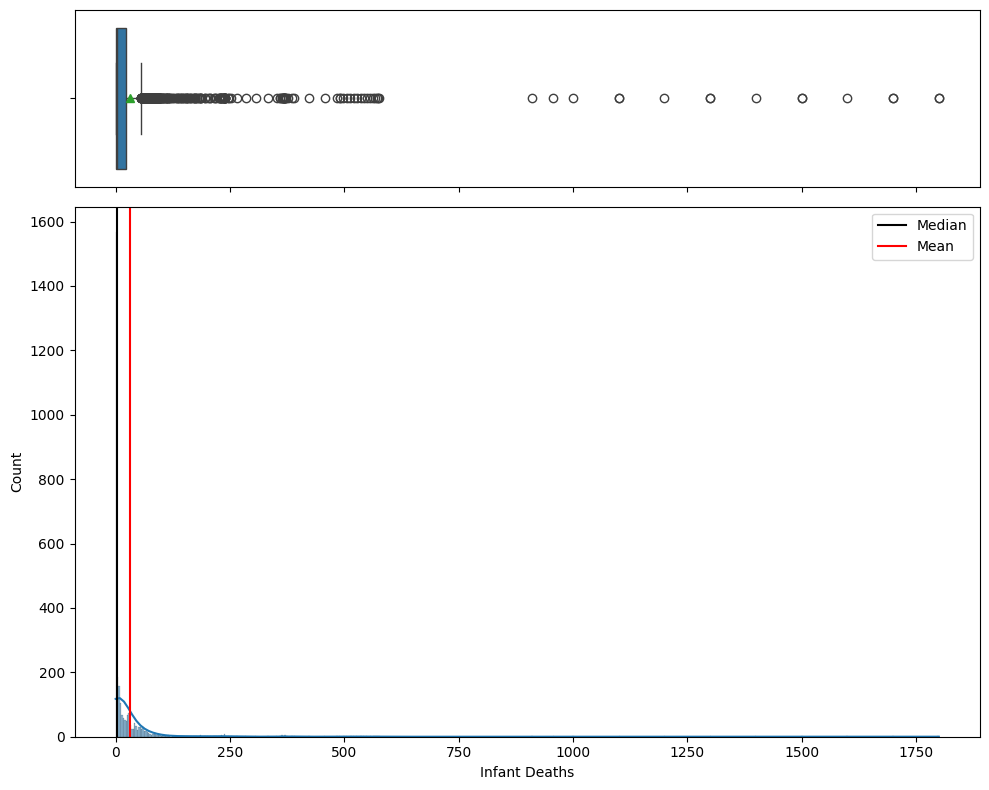

In [27]:
# Histogram and Boxplot for Infant deaths
hist_boxplot(df, 'Infant Deaths')

**Observations:**
* The plots show extreme right-skewness on infant deaths, showing numerous extreme outliers.

**Alchohol**

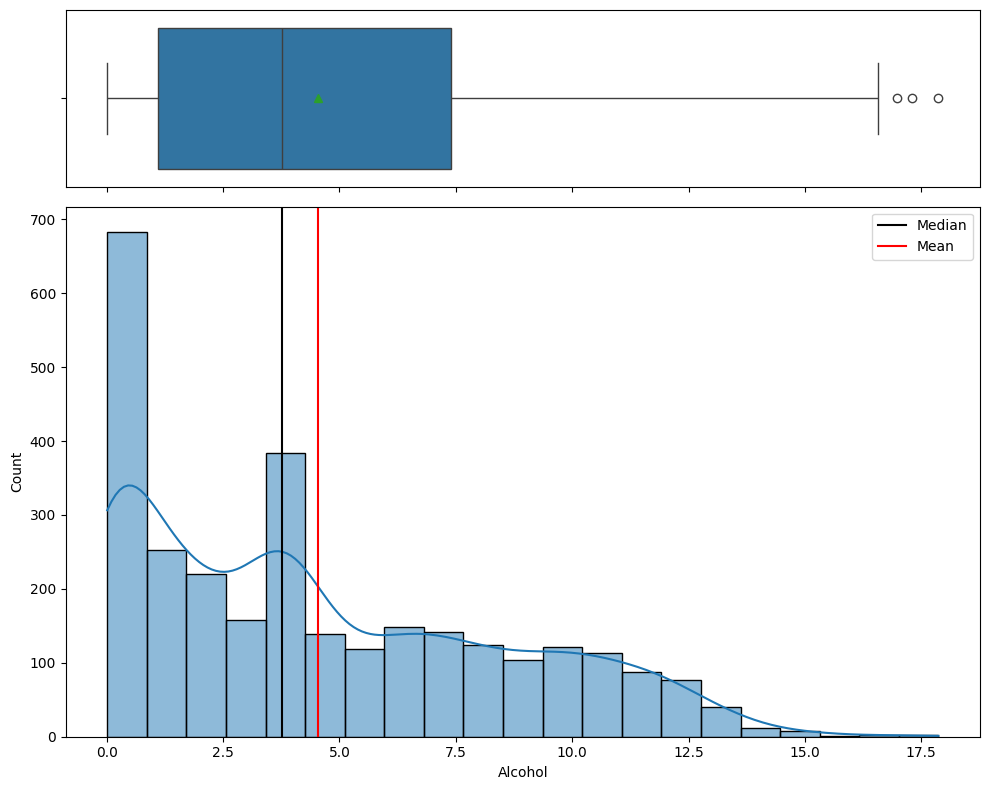

In [28]:
# Histogram and Boxplot for Alcohol
hist_boxplot(df, 'Alcohol')

**Observations:**
* The plots show right-skewness on alcohol and very few number of outliers over approximately 16.0.

**Percentage Expenditure**

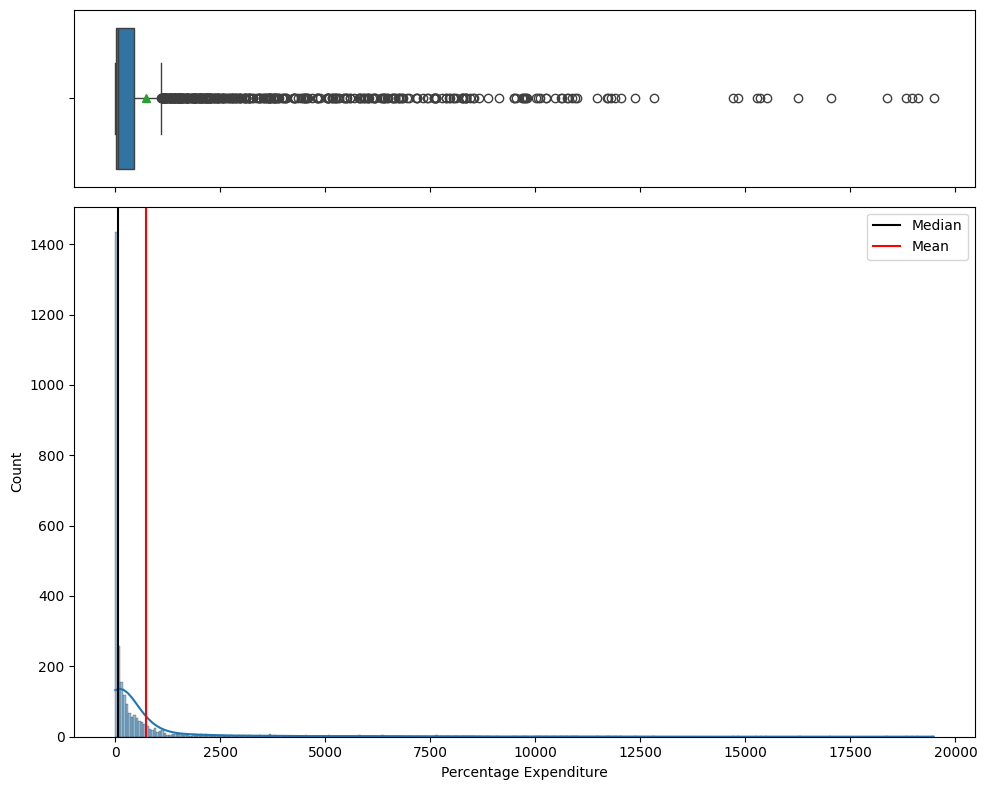

In [29]:
# Histogram and Boxplot for Percentage expenditure
hist_boxplot(df, 'Percentage Expenditure')

**Observations:**
* The plots show extreme right-skewness on percentage expenditure, showing numerous extreme outliers.

**Hepatitis B**

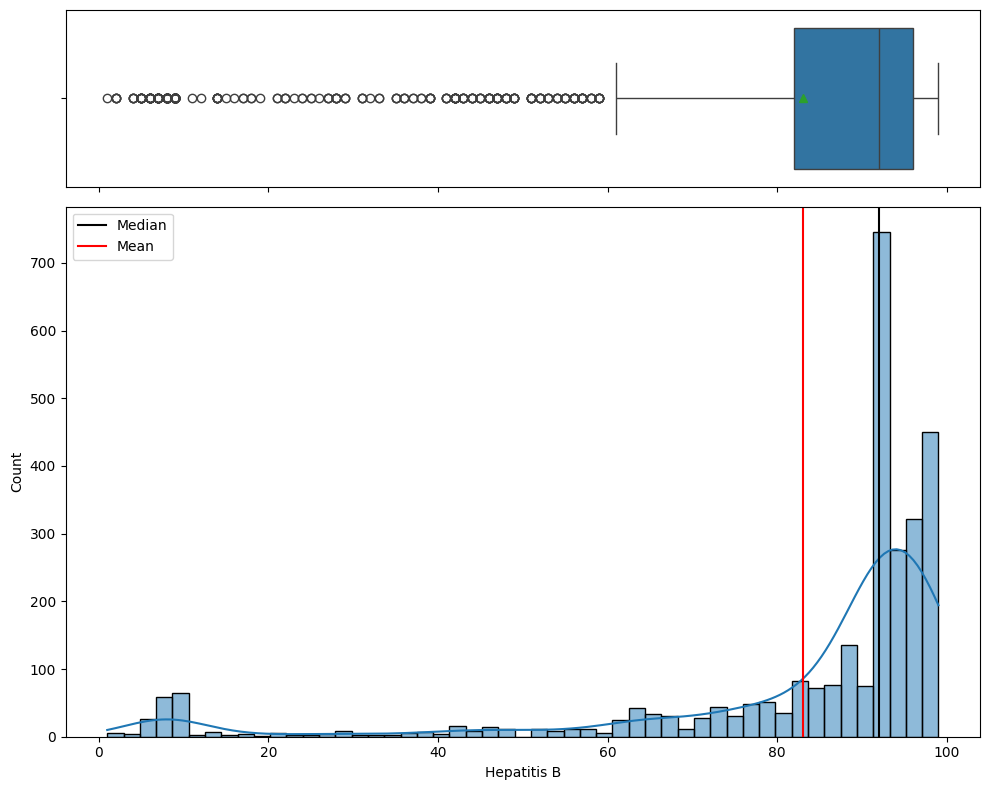

In [30]:
# Histogram and Boxplot for Hepatitis B
hist_boxplot(df, 'Hepatitis B')

**Observations:**
* The plots show left-skewness on hepatitis b and few number of outliers under approximately 60.

**Measles**

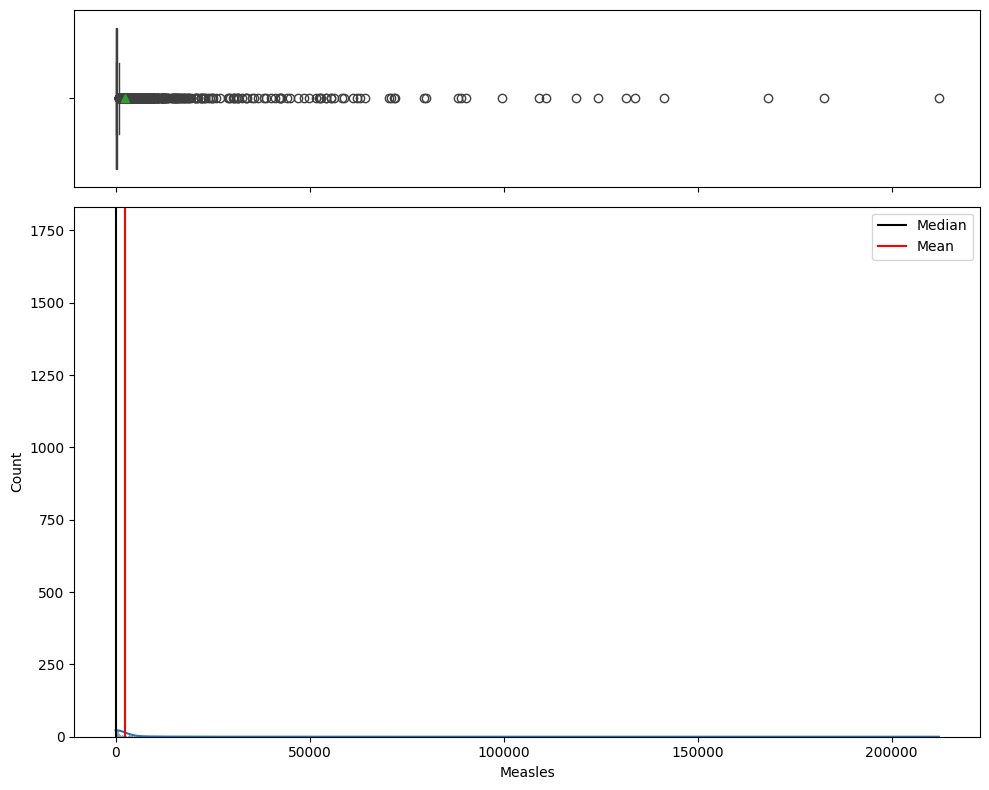

In [31]:
# Histogram and Boxplot for Measles
hist_boxplot(df, 'Measles')

**Observations:**
* The plots show extreme right-skewness on percentage expenditure, showing numerous extreme outliers.

**BMI**

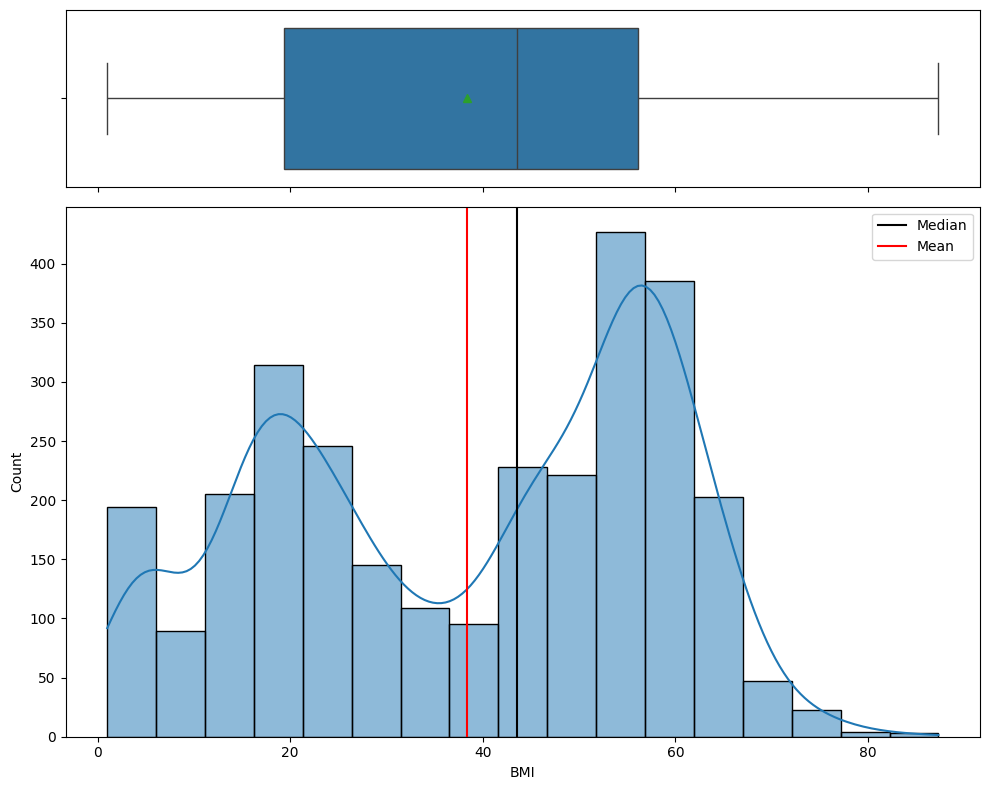

In [32]:
# Histogram and Boxplot for BMI
hist_boxplot(df, 'BMI')

**Observations:**
* The plots show bimodal distribution with peaks around 20 and 40 on BMI.

**Under Five Deaths**

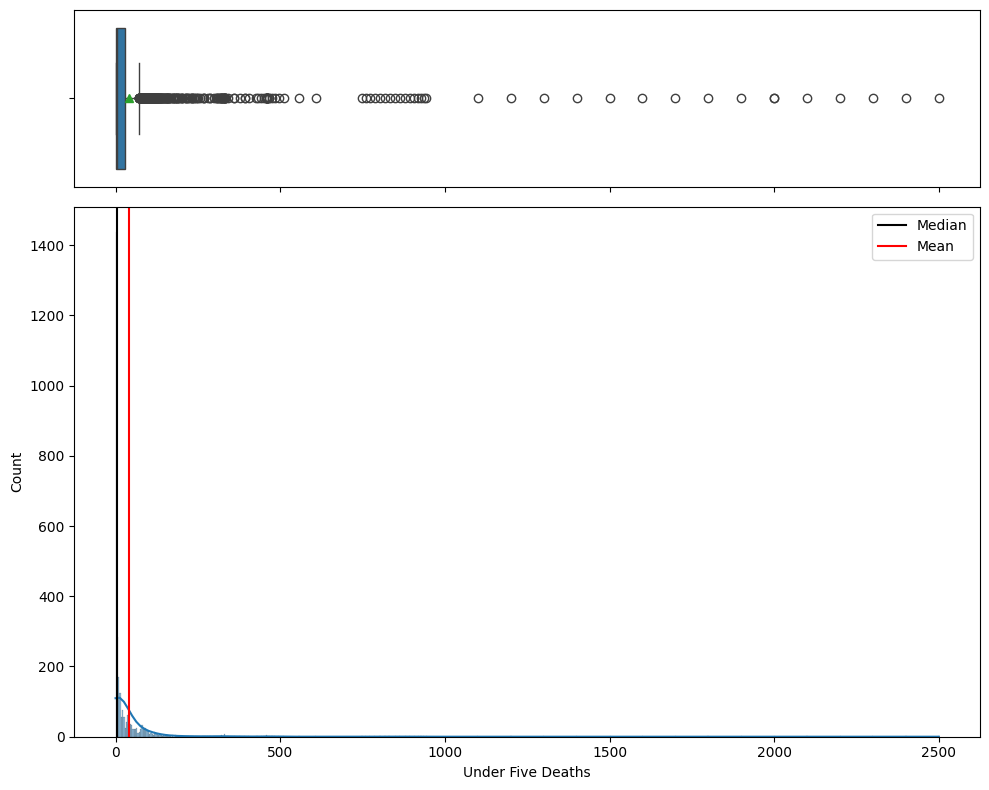

In [33]:
# Histogram and Boxplot for Under-five deaths
hist_boxplot(df, 'Under Five Deaths')

**Observations:**
* The plots show extreme right-skewness on under five deaths, showing numerous extreme outliers.

**Polio**

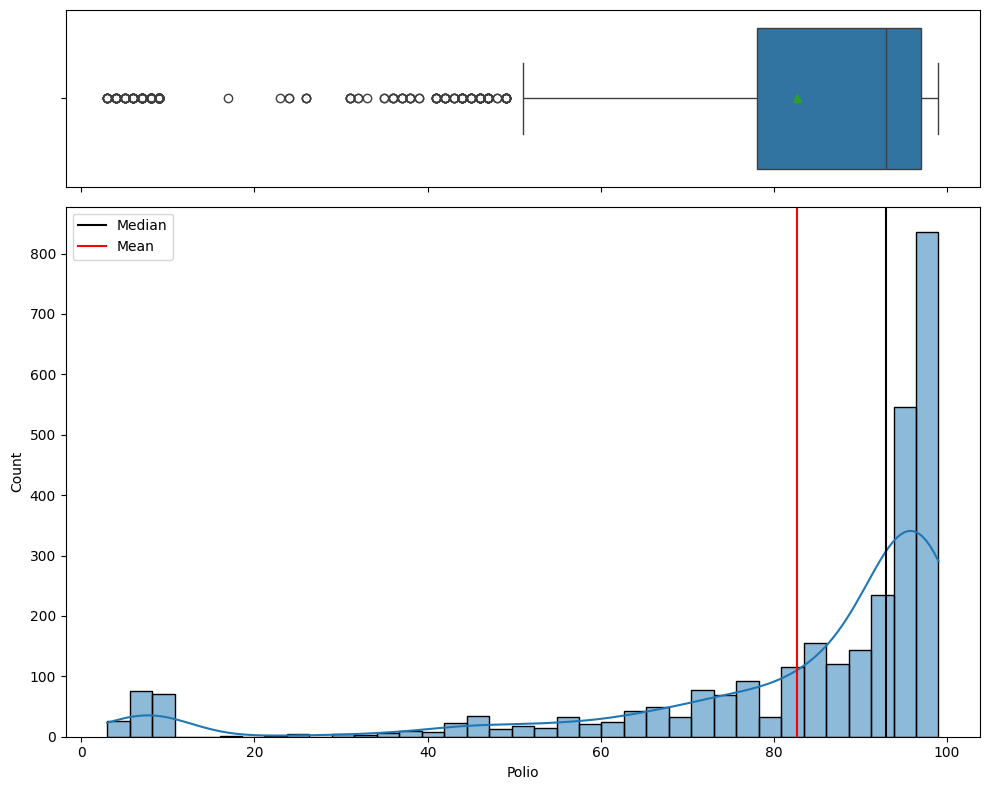

In [34]:
# Histogram and Boxplot for Polio
hist_boxplot(df, 'Polio')

**Observations:**
* The plots show left-skewness on polio and few number of outliers under approximately 50.

**Total Expenditure**

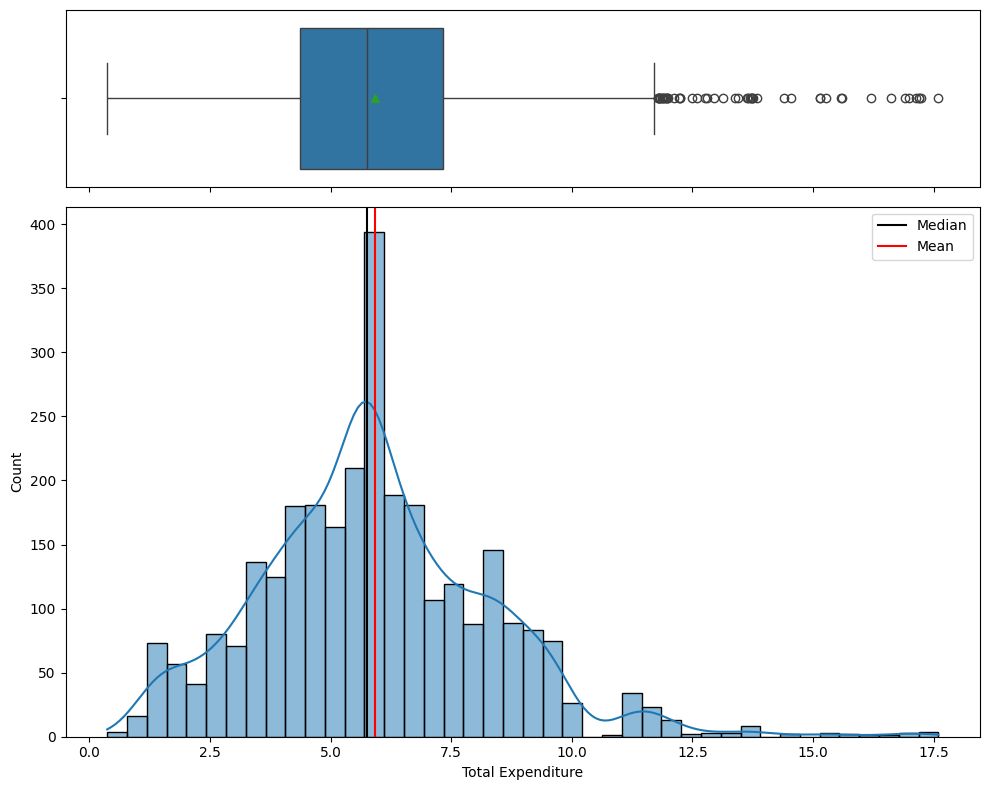

In [35]:
# Histogram and Boxplot for Total expenditure
hist_boxplot(df, 'Total Expenditure')

**Observations:**
* The plots show right-skewness on total expenditure and few number of outliers over approximately 11.0.

**Diphtheria**

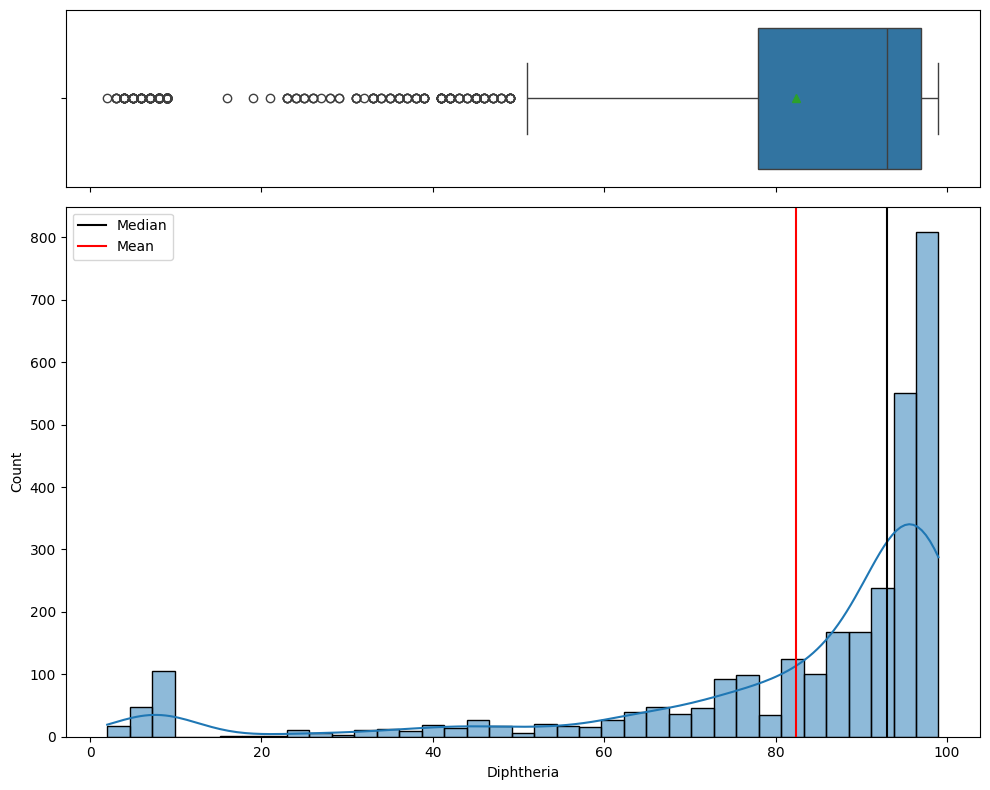

In [36]:
# Histogram and Boxplot for Diphtheria
hist_boxplot(df, 'Diphtheria')

**Observations:**
* The plots show left-skewness on diphtheria and few number of outliers under approximately 50.

**HIV/AIDS**

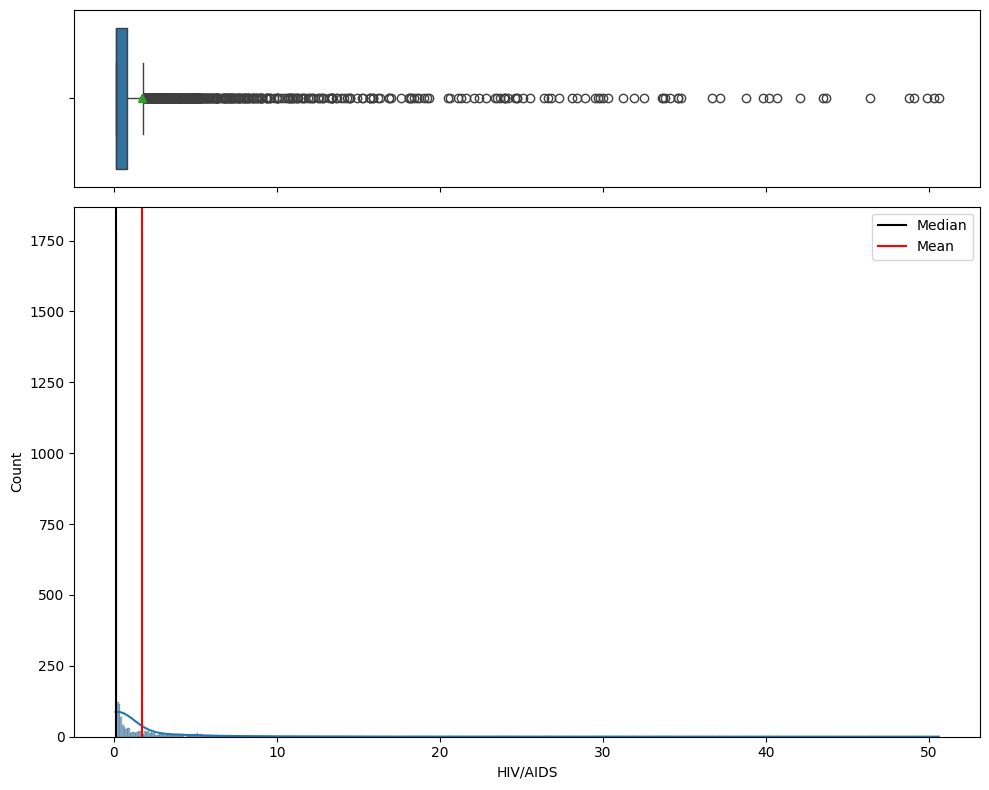

In [37]:
# Histogram and Boxplot for HIV/AIDS
hist_boxplot(df, 'HIV/AIDS')

**Observations:**
* The plots show extreme right-skewness on hiv/aids, showing numerous extreme outliers.

**GDP**

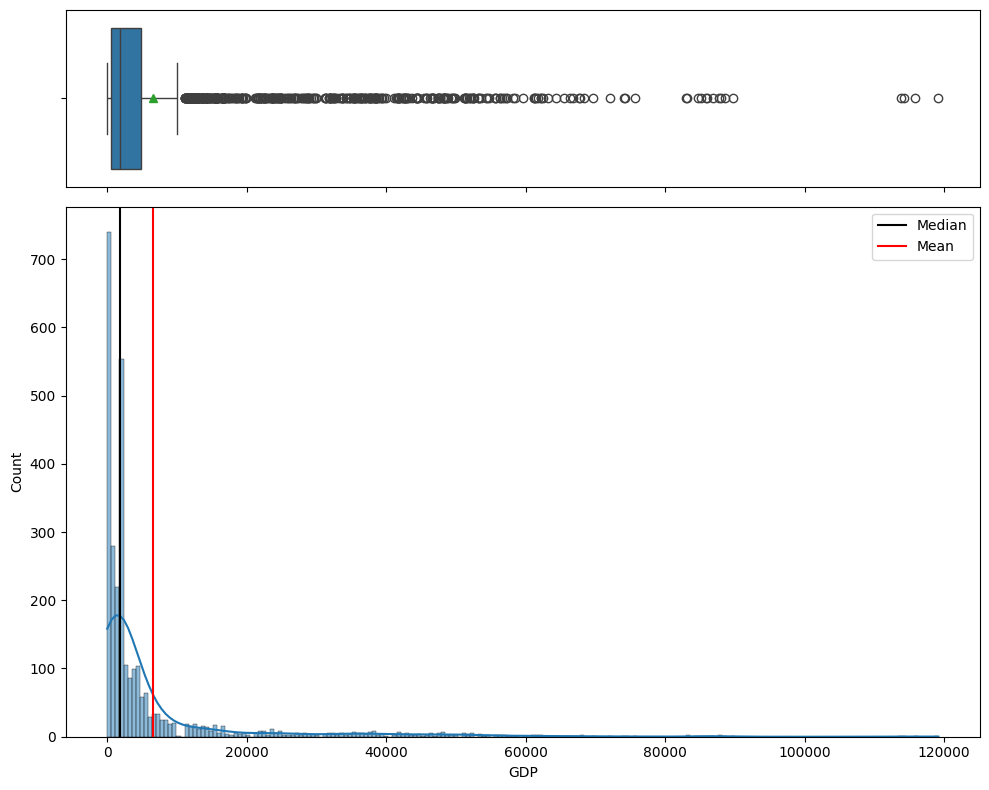

In [38]:
# Histogram and Boxplot for GDP
hist_boxplot(df, 'GDP')

**Observations:**
* The plots show extreme right-skewness on GDP, showing numerous extreme outliers.

**Population**

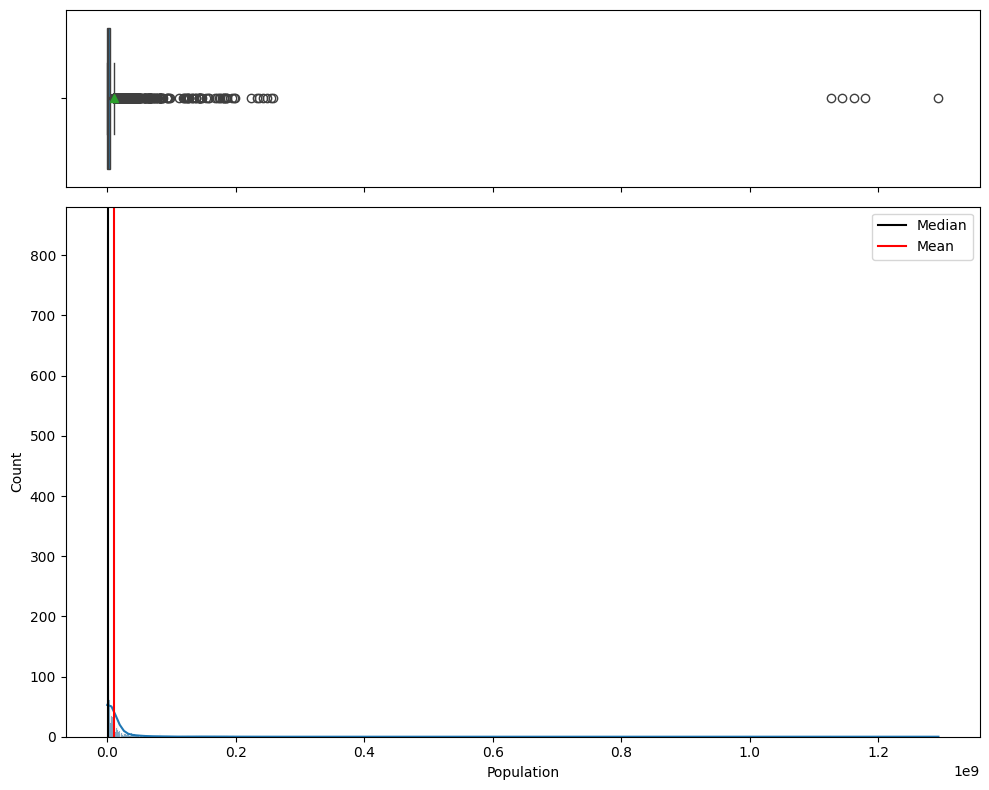

In [39]:
# Histogram and Boxplot for Population
hist_boxplot(df, 'Population')

**Observations:**
* The plots show extreme right-skewness on under population, showing numerous extreme outliers.

**Thiness 1-19 Years**

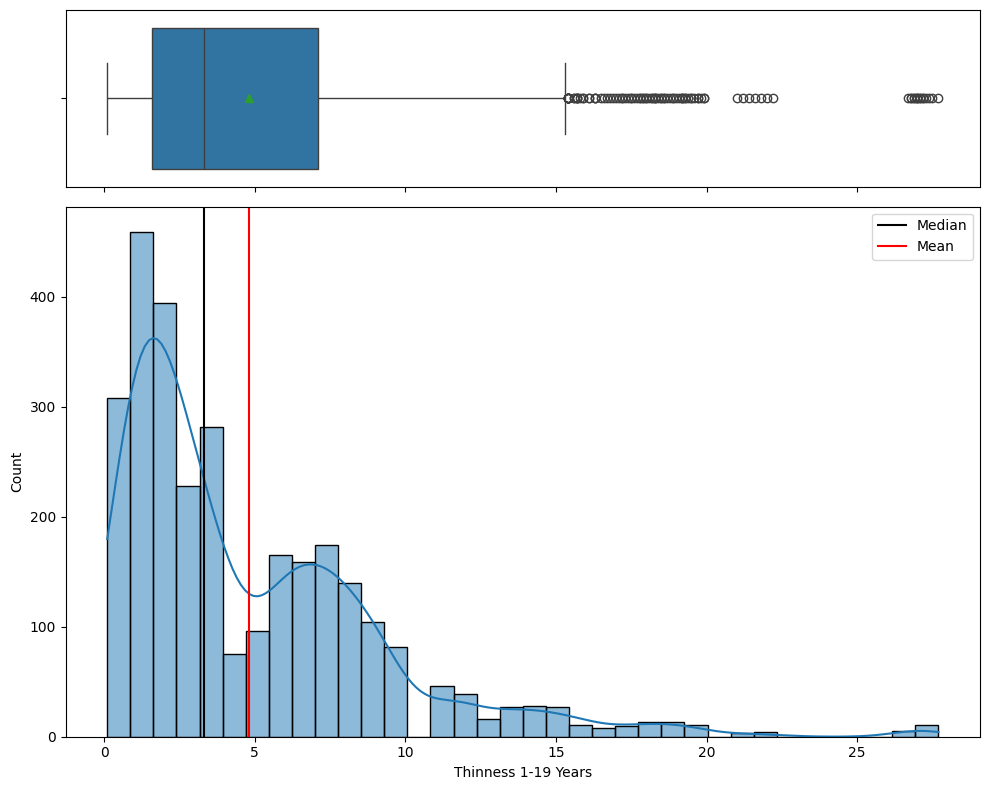

In [40]:
# Histogram and Boxplot for Thinness 1-19 years
hist_boxplot(df, 'Thinness 1-19 Years')

**Observations:**
* The plots show right-skewness on thiness 1-19 years and numerous number of outliers over approximately 15.

**Thiness 5-9 Years**

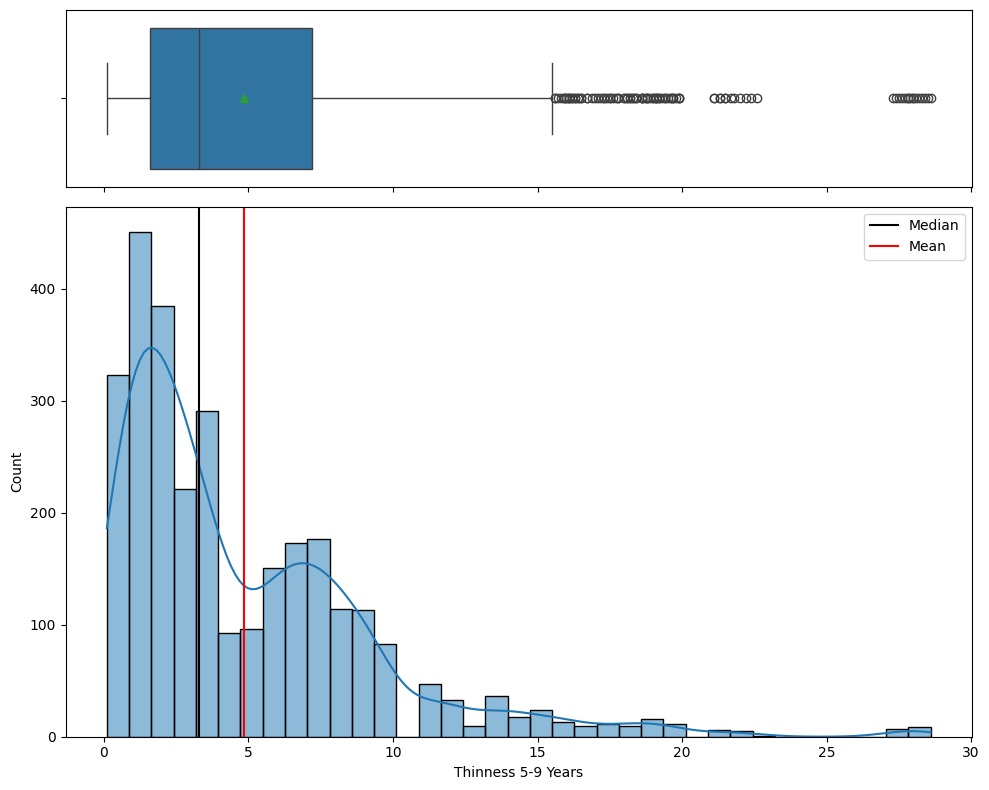

In [41]:
# Histogram and Boxplot for Thinness 5-9 years
hist_boxplot(df, 'Thinness 5-9 Years')

**Observations:**
* The plots show right-skewness on thiness 5-9 years and numerous number of outliers over approximately 15.

**Income Composition of Resources**

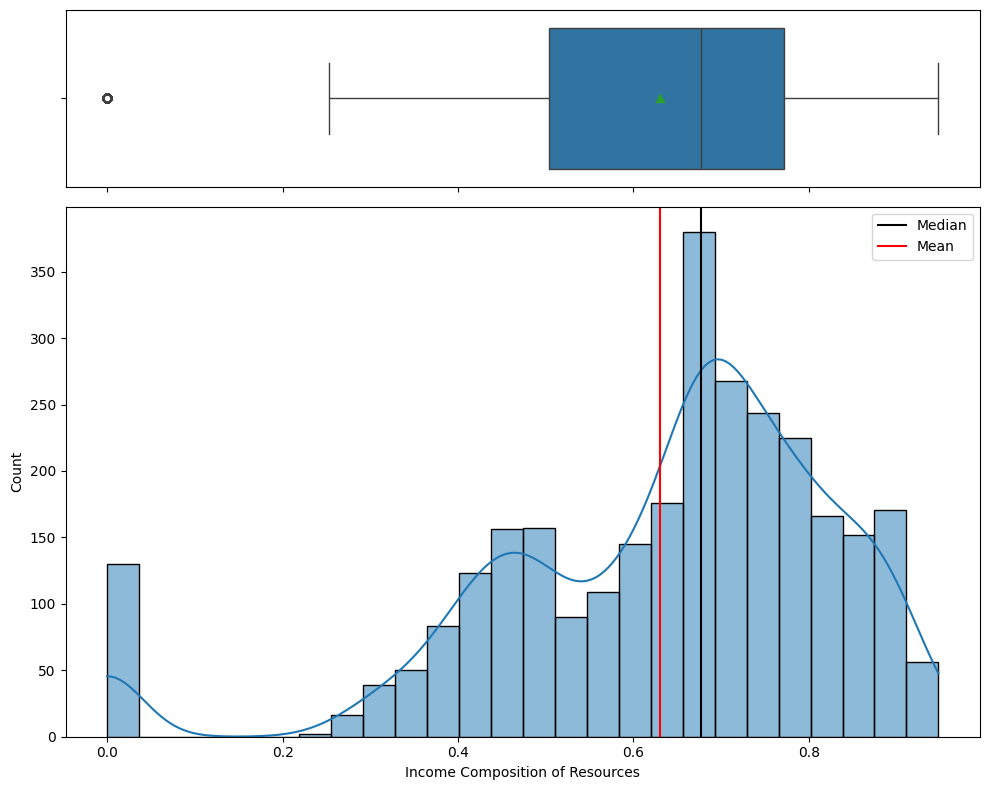

In [42]:
# Histogram and Boxplot for Income composition of resources
hist_boxplot(df, 'Income Composition of Resources')

**Observations:**
* The plots show left-skewness on income composition of resources and very few number of outliers under approximately 0.2.

**Schooling**

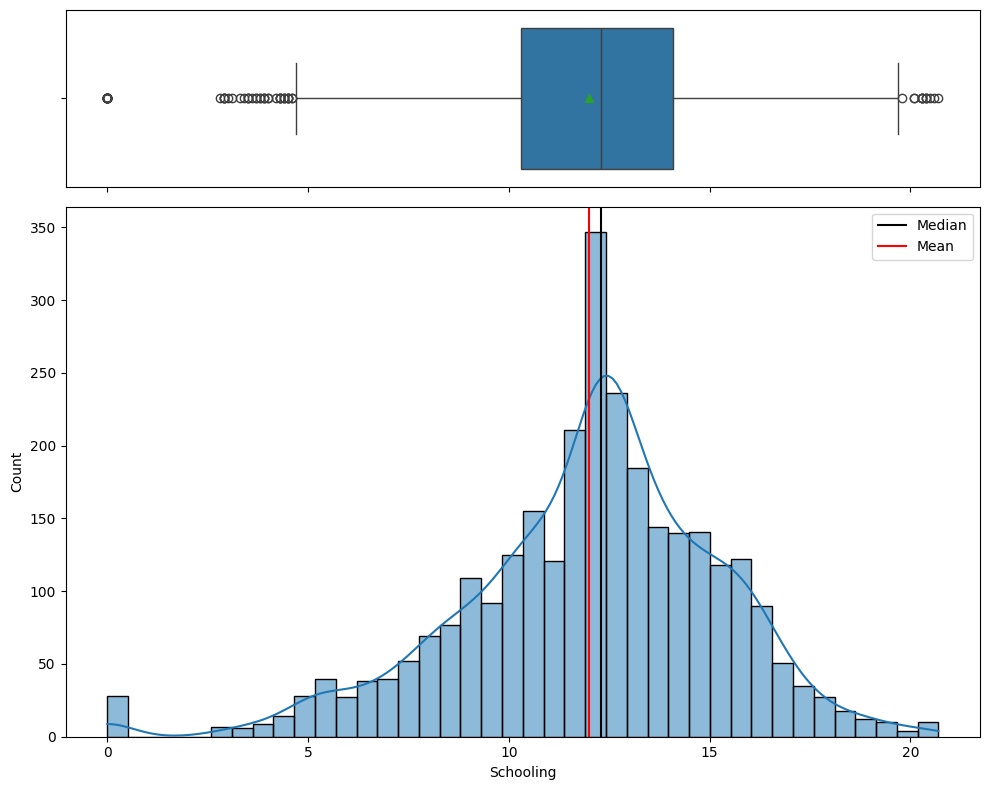

In [43]:
# Histogram and Boxplot for Schooling
hist_boxplot(df, 'Schooling')

**Observations:**
* The plots show distribution close to normal and few number of outliers under 5 and sligtly under 20.

## Bivariate Analysis

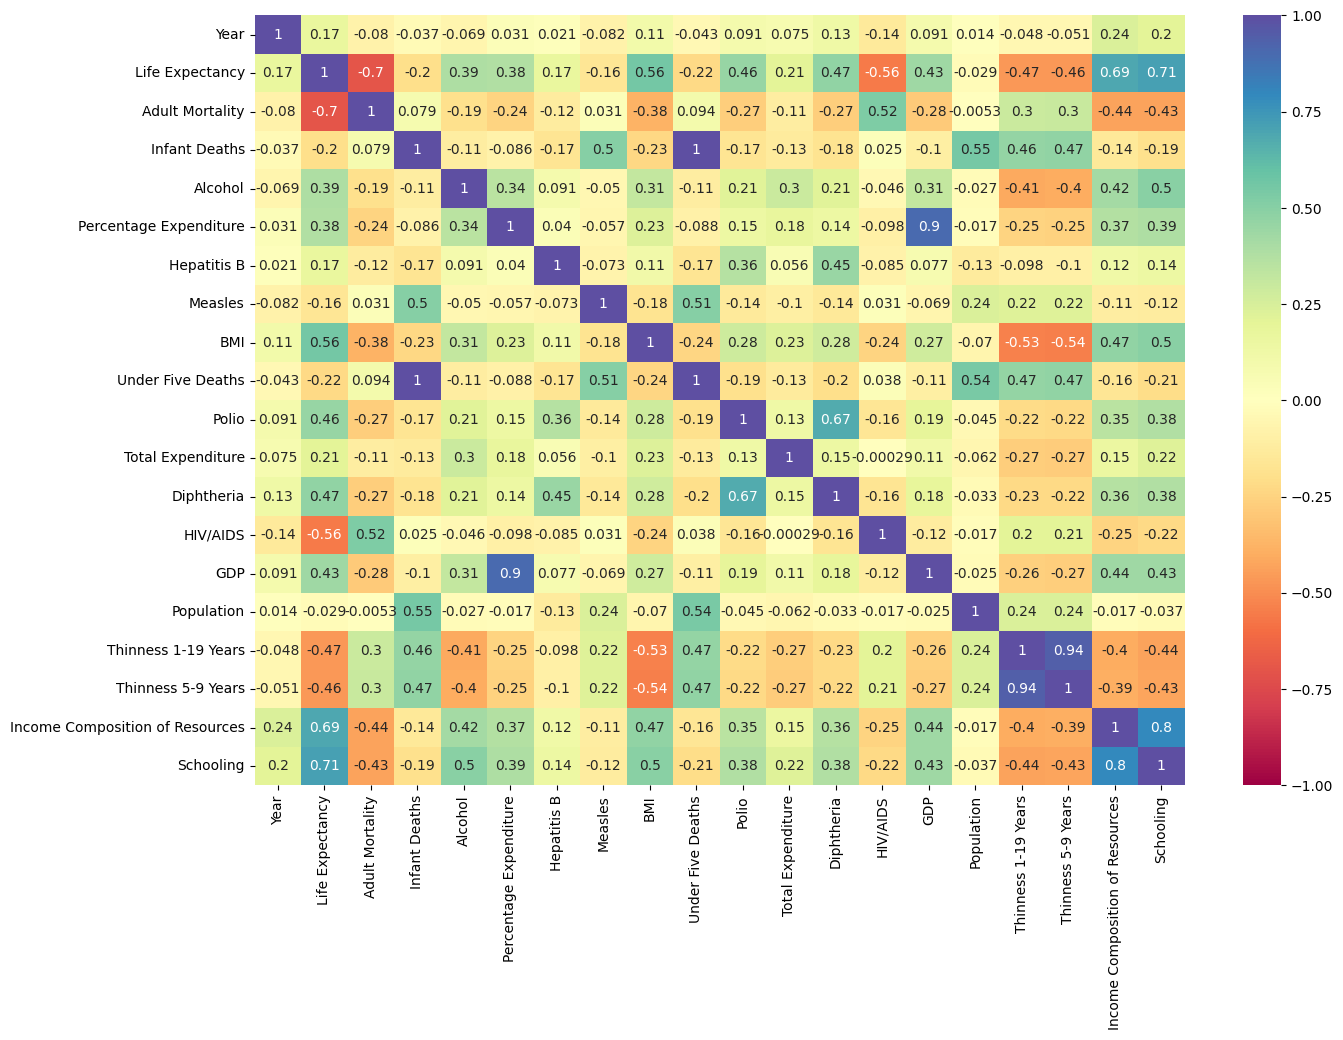

In [44]:
# Listing the numerical varaibles
num_cols = df.select_dtypes(include = np.number).columns.tolist()

# Correlation check
plt.figure(figsize = (15, 10))
sns.heatmap(df[num_cols].corr(), vmin = -1, vmax = 1, annot = True, cmap = 'Spectral')
plt.show()

**Observations:**
* Adult Mortality, HIV/AIDS Prevalence, and Thinness in Youth: These factors show a strong negative correlation with life expectancy, indicating that as rates of adult mortality, HIV/AIDS, and thinness among young people increase, life expectancy tends to decrease. This trend is often seen in low-income countries where limited access to healthcare, nutrition, and preventive measures contributes to higher mortality rates and lower overall health.

* BMI, Income Composition of Resources, and Schooling: The positive association between these factors and life expectancy suggests that in high-income countries, people have better access to nutritious food, robust income structures, and education levels, contributing to overall well-being and longer life spans.

**Life Expectancy & Year**

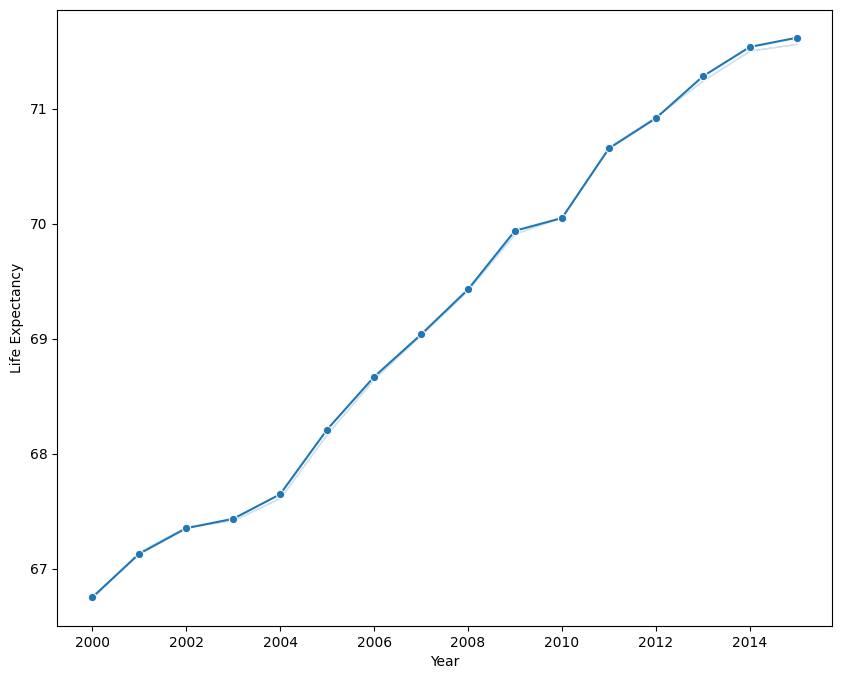

In [45]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df, x = 'Year', y = 'Life Expectancy', ci = False, marker = 'o')
plt.show()

* The lineplot shows steady improvement in life expectancy, indicating reductions in mortality.
* This may be due to enhanced standard of living and quality of care.

**Life Expectancy & Status**

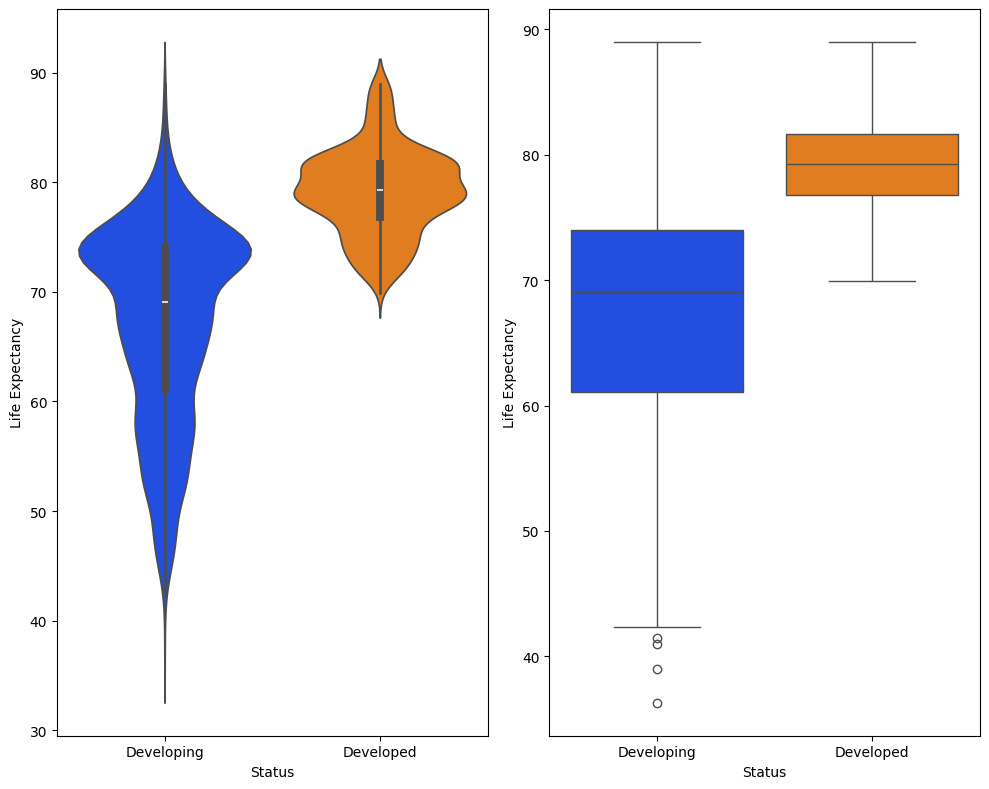

In [46]:
plt.figure(figsize = (10, 8))
plt.subplot(121)
sns.violinplot(data = df, x = 'Status', y = 'Life Expectancy', palette = 'bright')

plt.subplot(122)
sns.boxplot(data = df, x = 'Status', y = 'Life Expectancy', palette = 'bright')
plt.tight_layout()
plt.show()

* The life expectancy of developing countries varies from under 40 to approximately 90 years.
* The life expectancy of developed countries ranges from approximately 70 to nearly 90, showing significantly higher life expectancy.
* This suggests that developed countries have better medical service in general that affects life expectancy compared to developing countries.

**Lifr Expectancy & Schooling**

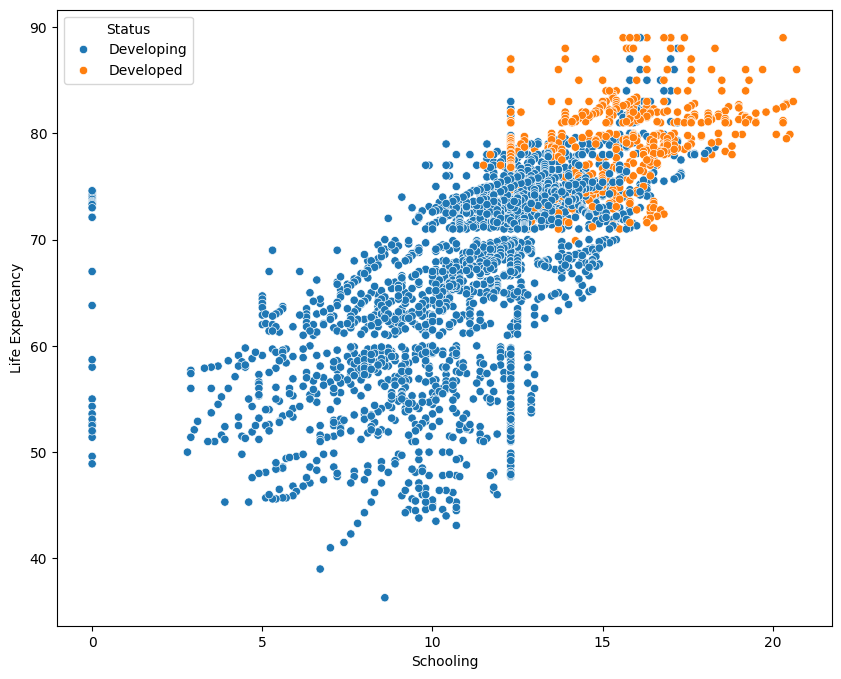

In [47]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Schooling', y = 'Life Expectancy', hue = 'Status')
plt.show()

* The plot shows upward pattern of life expectancy as the average year of schooling increases, suggesting more education levels lead to better life expectancy.

* Developed countries show significantly higher life expectancy on education levels than developing countries.

* Education is one of the factors of social determinants of health that impacts individual's health outcomes by affecting elements such as income, access to healthcare, and general lifestyle choices.

**Life Expectancy & Income Composition of Resources**

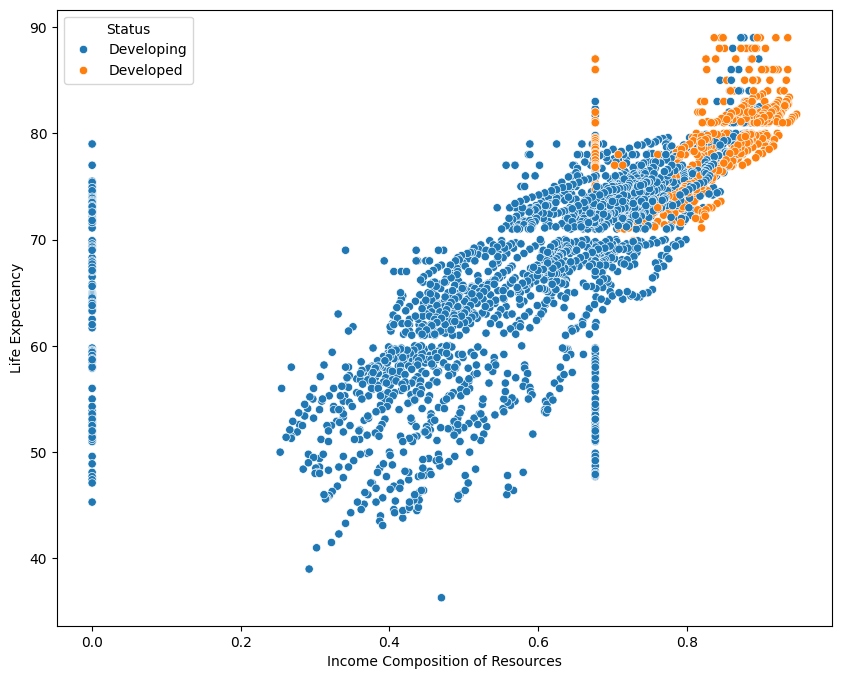

In [48]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df, x = 'Income Composition of Resources', y = 'Life Expectancy', hue = 'Status')
plt.show()

* The findings from this plot aligns with the findings of life expectancy & schooling.

* The education level, which is a major factor affecting the income positively influences the life expectancy.

## Data Preprocessing

### Outlier Checking

* The purpose of this study is to find which factors influence life expectancy, therefore Country and Year variables will be dropped.

In [49]:
# Dropping the Country variable.
df = df.drop(['Country', 'Year'], axis = 1)
df.columns

Index(['Status', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths',
       'Alcohol', 'Percentage Expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling'],
      dtype='object')

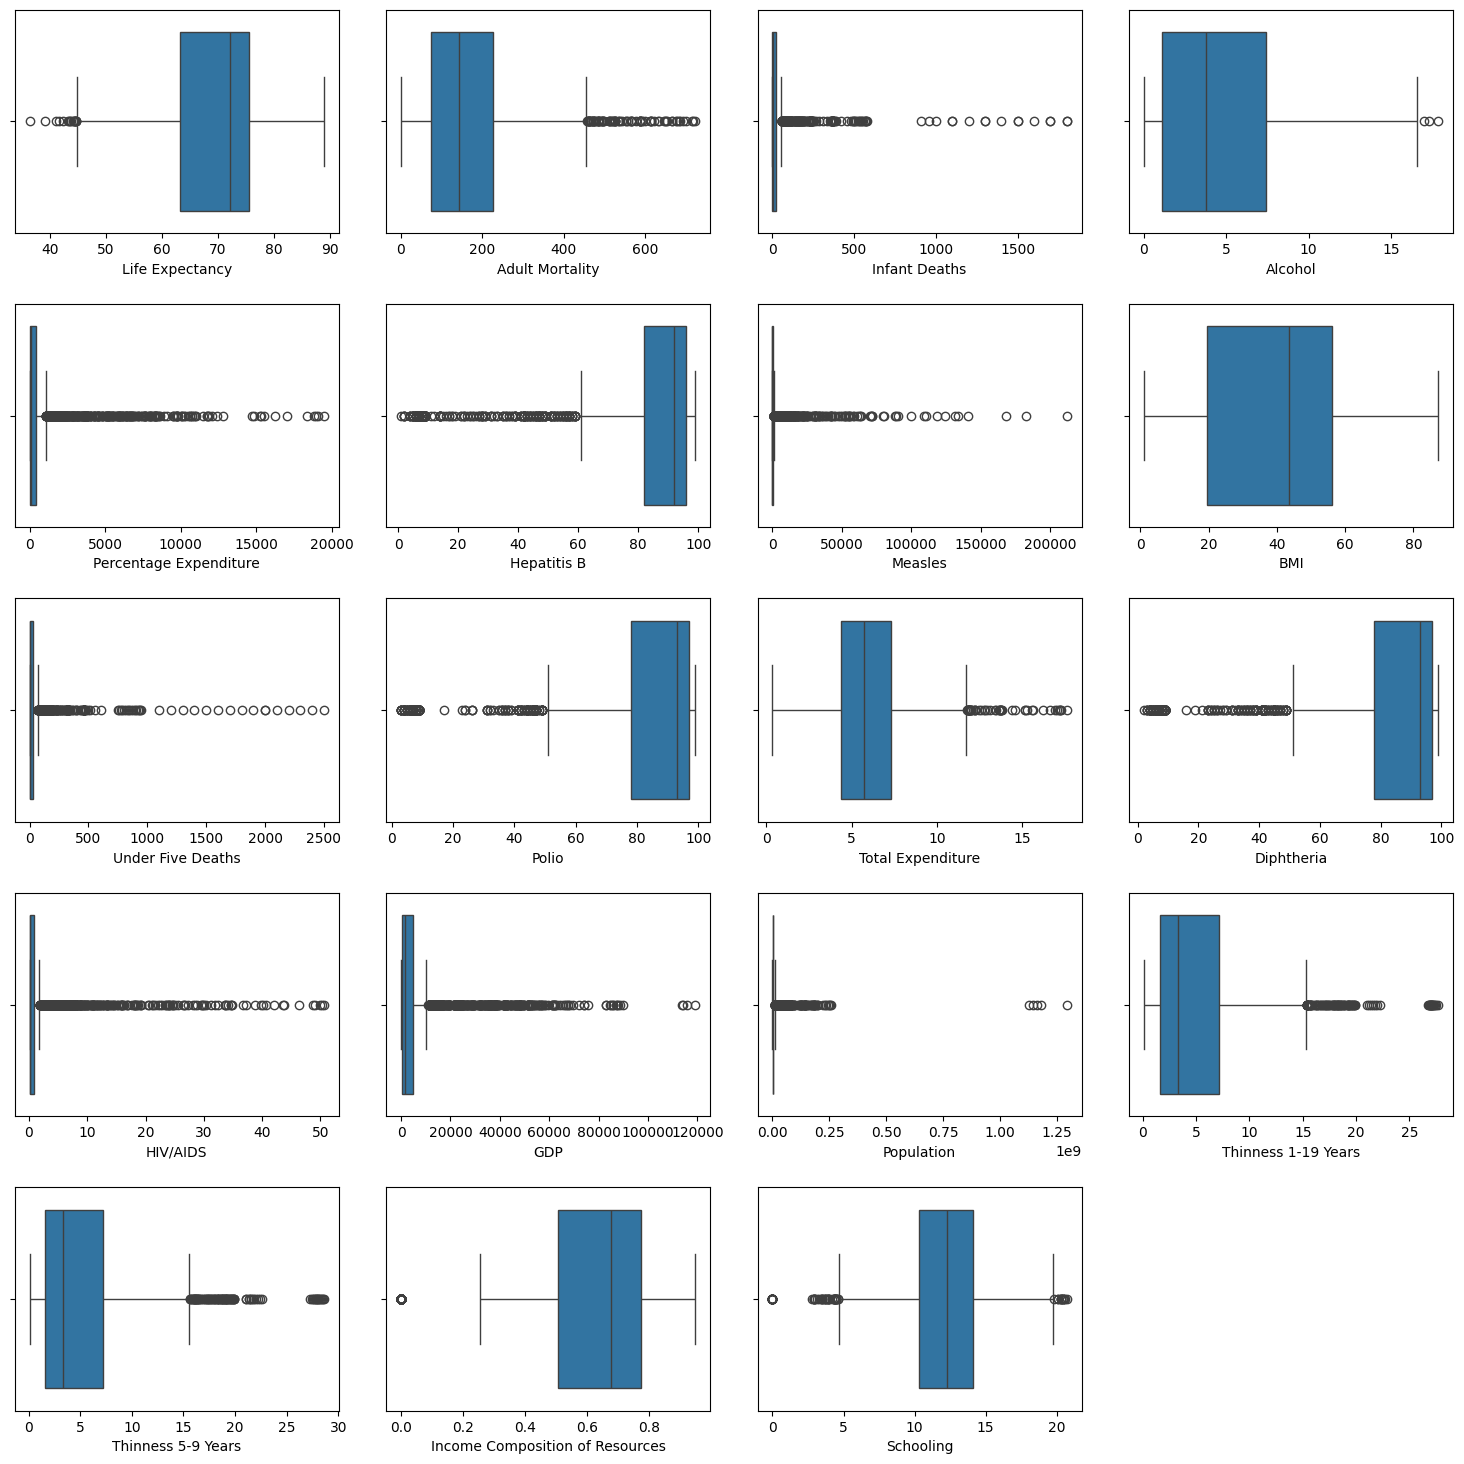

In [50]:
# Plotting the outliers of numeric columns
num_cols = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 15))

for i, variable in enumerate(num_cols):
      plt.subplot(5, 4, i + 1)
      sns.boxplot(data = df, x = variable)
      plt.tight_layout(pad = 2)
plt.show()

**Observations:**
* Some of the features have a lot of outliers, however, whether the extreme values are genuine values will be decided after model performance review.

## Data Preparation for Modeling

In [51]:
# Defining the dependent and independent features
X = df.drop(['Life Expectancy'], axis = 1) # Predictors
y = df['Life Expectancy'] # Target

# Adding the intercept to data
X = sm.add_constant(X)

# Creating dummy variables
X = pd.get_dummies(X, columns = df.select_dtypes(include = 'object').columns.tolist(),
                 drop_first = True)

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print('Number of observations in training data:', X_train.shape[0])
print('Number of observations in test data:', X_test.shape[0])

Number of observations in training data: 2056
Number of observations in test data: 882


In [52]:
# Converting the boolean data types into integer data type
X_train['Status_Developing'] = X_train['Status_Developing'].astype(np.int64)
X_test['Status_Developing'] = X_test['Status_Developing'].astype(np.int64)

## Model Building - Linear Regression

In [53]:
# Defining and fitting the model
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     504.5
Date:                Tue, 17 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:05:55   Log-Likelihood:                -5773.3
No. Observations:                2056   AIC:                         1.159e+04
Df Residuals:                    2036   BIC:                         1.170e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Observations**

- The baseline life expectancy is 56.3854.

- HIV/AIDS shows strong negative relationship with life expectancy.

- Income composition and schooling show highly positive relationship with life expectancy.

- Both the R-squared and Adjusted R squared of our model are greater than 0.8, indicating that it can explain more than 80% of the variance in life expectancy.

## Model Performance Check

* $R^2$, Adjusted $R^2$, Root mean squared error, Mean absolute error, and Mean absolute percentage error will be used as a standard to assess model performance.

In [54]:
# Function to compute adjusted R-squared
def adjr2_score(predictors, target, predictions):
    r2 = r2_score(target, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute MAPE
def mape_score(target, predictions):
    return np.mean(np.abs(target - predictions) / target) * 100

# Function to compute different metrics to check model performace
def model_performance_checker(model, predictors, target):
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    adj_r2 = adjr2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # Creating a dataframe for metrics
    perf_df = pd.DataFrame({
      'RMSE': rmse,
      'MAE': mae,
      'R-Squared': r2,
      'Adj R-Squared': adj_r2,
      'MAPE': mape}, index = [0])

    return perf_df

In [55]:
# Printing the model performance for training and test data
print('Training Performance:')
olsmod_train_perf = model_performance_checker(olsmod, X_train, y_train)
print(olsmod_train_perf)
print('-' * 51)
print('Test Performance:')
olsmod_test_perf = model_performance_checker(olsmod, X_test, y_test)
print(olsmod_test_perf)

Training Performance:
     RMSE     MAE  R-Squared  Adj R-Squared    MAPE
0 4.01121 2.99148    0.82479        0.82307 4.57632
---------------------------------------------------
Test Performance:
     RMSE     MAE  R-Squared  Adj R-Squared    MAPE
0 4.10934 3.08440    0.80596        0.80146 4.69944


**Observations:**

* The model performance shows decent prediction capcaity, good model fitting and low error rates.
* The similar perforamce between training and testing indicates there is no overfitting of the model.
* However, there is a room for improvement to enhance the model performance.
* The general performance of the model does not seem to imply that outliers are major issue for this case, therefore the influential points will be dropped to increase model stability and reduce potential bias.

### Log transformation (selected attributes) + Dropping influential values

In [56]:
from statsmodels.stats.outliers_influence import OLSInfluence
df1 = df.copy()

# Listing the numeric features of the data
num_cols = df1.select_dtypes(include = np.number).columns.tolist()

# Preparing the features and target
X1 = df1[num_cols].drop(['Life Expectancy'], axis=1)
y1 = df1['Life Expectancy']

# Adding a constant to the model (intercept)
X1 = sm.add_constant(X1)

# Fitting the model
model1 = sm.OLS(y1, X1).fit()

# Calculating Cook's distance
influence = OLSInfluence(model1)
cooks_d = influence.cooks_distance

In [57]:
# Identifying influential points
n = len(df1)
threshold = 4 / n
high_influence = np.where(cooks_d[0] > threshold)[0]

# Creating new dataframe
df1 = df1.drop(high_influence)
df1.shape

(2748, 20)

**Observations:**
* Some influential points has been dropped.

In [58]:
# Variables with skewness
no_transform = ['Life expectancy', 'Alcohol', 'BMI', 'Income composition of resources', 'Schooling']

for col in df1[num_cols]:
  # Log transformation
  if col not in no_transform:
    df1[col] = np.log(df1[col] + 1) # add 1 to prevent log(0)

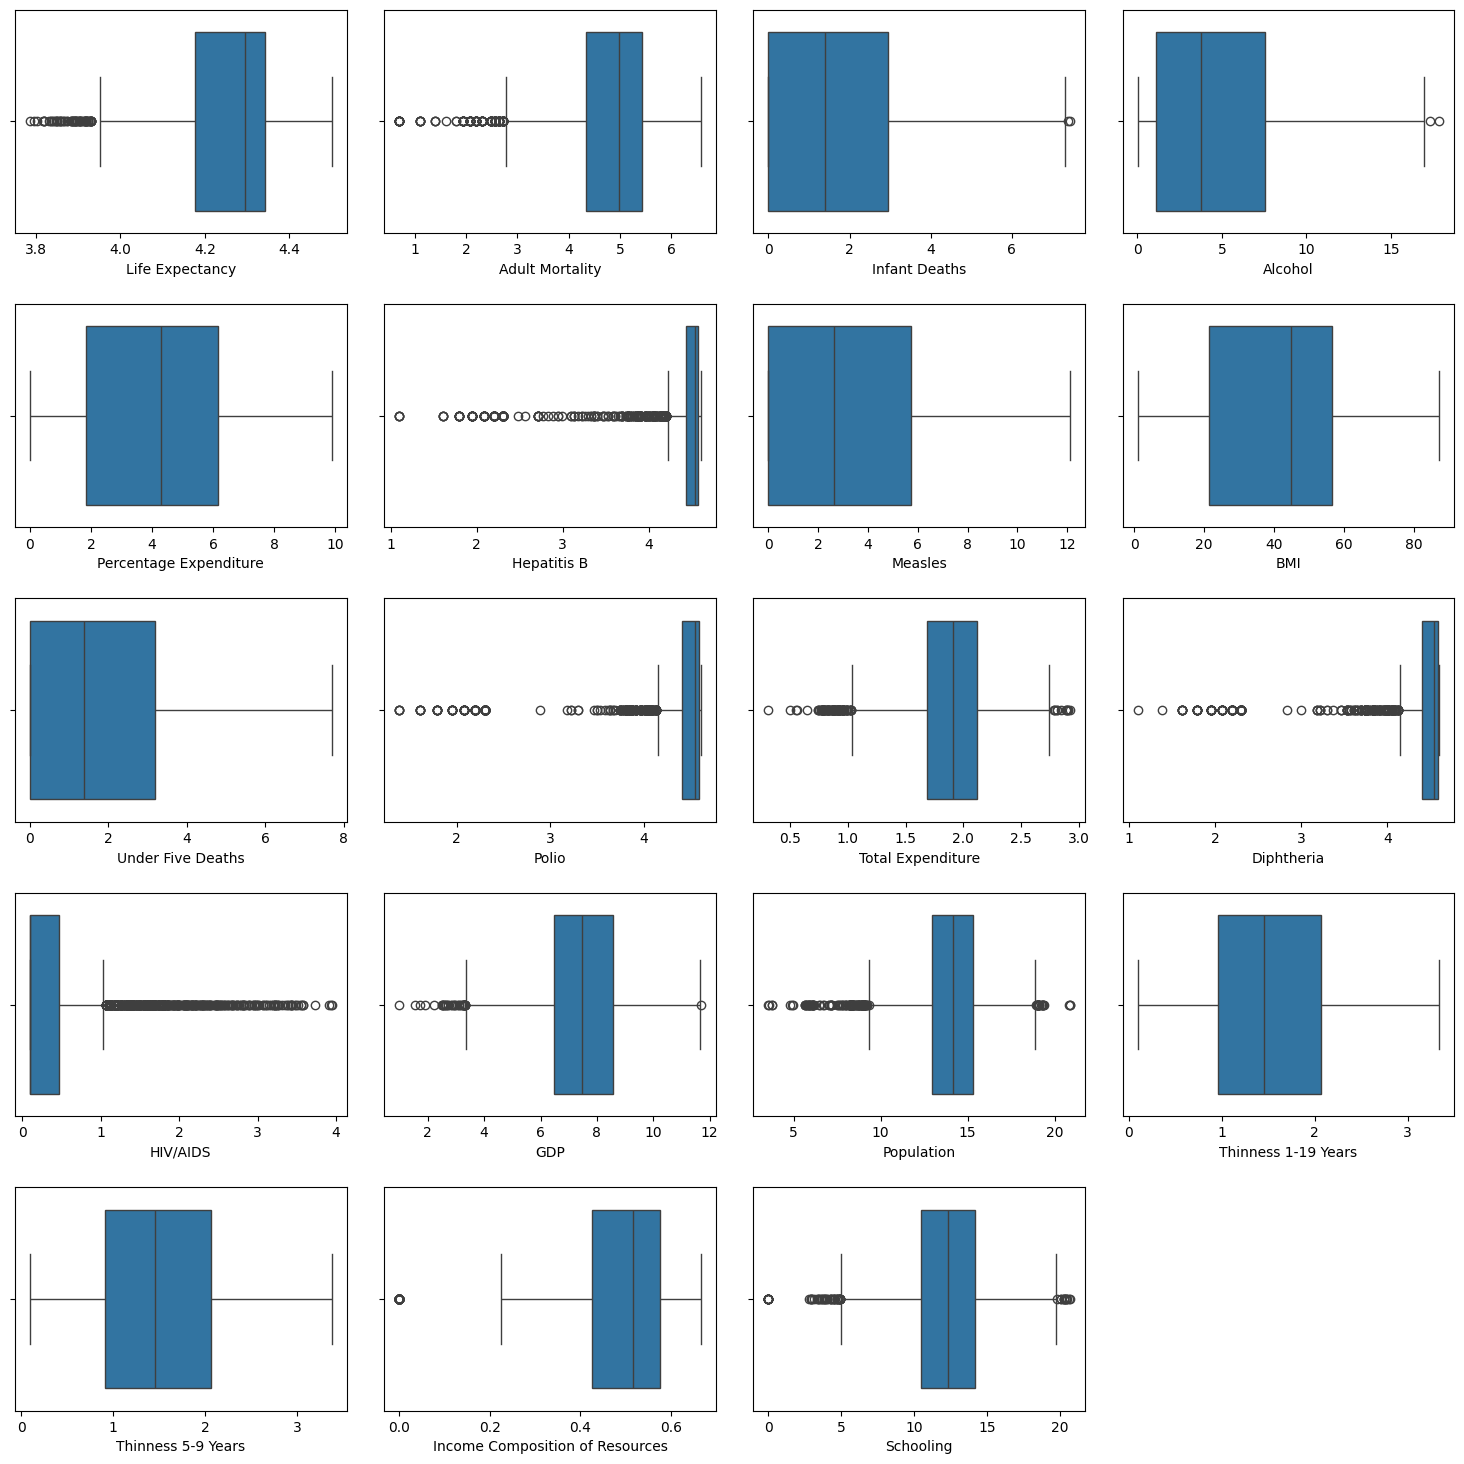

In [59]:
# Plotting the outliers of numeric columns
plt.figure(figsize = (15, 15))

for i, variable in enumerate(num_cols):
      plt.subplot(5, 4, i + 1)
      sns.boxplot(data = df1, x = variable)
      plt.tight_layout(pad = 2)
plt.show()

**Observations:**
* After dropping influential points and log transformation, some variables seems to be close to normal distribution while others are still highly skewed.

In [60]:
# Defining the dependent and independent features
X1 = df1.drop(['Life Expectancy'], axis = 1) # Predictors
y1 = df1['Life Expectancy'] # Target

# Adding the intercept to data
X1 = sm.add_constant(X1)

# Creating dummy variables
X1 = pd.get_dummies(X1, columns = df1.select_dtypes(include = 'object').columns.tolist(),
                 drop_first = True)

# Splitting the data in 70:30 ratio for train to test data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 1)

print('Number of observations in training data:', X_train1.shape[0])
print('Number of observations in test data:', X_test1.shape[0])

Number of observations in training data: 1923
Number of observations in test data: 825


In [61]:
# Converting the boolean data types into integer data type
X_train1['Status_Developing'] = X_train1['Status_Developing'].astype(np.int64)
X_test1['Status_Developing'] = X_test1['Status_Developing'].astype(np.int64)

# Fitting the second model
olsmod1 = sm.OLS(y_train1, X_train1).fit()

In [62]:
# Comparing the training and test performance of second model
print('Training Performance:')
olsmod_train1_perf = model_performance_checker(olsmod1, X_train1, y_train1)
print(olsmod_train1_perf)
print('-' * 40)
print('Test Performance:')
olsmod_test1_perf = model_performance_checker(olsmod1, X_test1, y_test1)
print(olsmod_test1_perf)

Training Performance:
     RMSE     MAE  R-Squared  Adj R-Squared    MAPE
0 0.05064 0.03864    0.85337        0.85183 0.91437
----------------------------------------
Test Performance:
     RMSE     MAE  R-Squared  Adj R-Squared    MAPE
0 0.04689 0.03545    0.87616        0.87308 0.84004


**Observations:**
* It is displayed that this method has slightly improved the predictive power and reudced the errors, however there might still be the possibility of improving model performance by transforming all the varibles.

* This method might find the subtle or hidden influences of outliers and may have better impact on the model performance.

In [63]:
# Comparing the training performances
perf_df_train = pd.concat([
    olsmod_train_perf.T, olsmod_train1_perf.T
], axis = 1)

perf_df_train.columns = ['Model 1', 'Model 2']
print('Training Performance Comparison: ')
perf_df_train

Training Performance Comparison: 


,Model 1,Model 2
RMSE,4.01121,0.05064
MAE,2.99148,0.03864
R-Squared,0.82479,0.85337
Adj R-Squared,0.82307,0.85183
MAPE,4.57632,0.91437


In [64]:
# Comparing the test performances
perf_df_test = pd.concat([
    olsmod_test_perf.T, olsmod_test1_perf.T
], axis = 1)

perf_df_test.columns = ['Model 1', 'Model 2']
print('Test Performance Comparison: ')
perf_df_test

Test Performance Comparison: 


,Model 1,Model 2
RMSE,4.10934,0.04689
MAE,3.08440,0.03545
R-Squared,0.80596,0.87616
Adj R-Squared,0.80146,0.87308
MAPE,4.69944,0.84004


**Observations:**

* Upon comparison, although Model 2 demonstrates better prediction power (in terms of R-squared) and exhibits significantly lower error rates across all metrics.

* Therefore Model 2 (dropping influential values & log transformation for the whole data) shows significant improvement in overall metrics and will be used for further analysis.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST for Multicollinearity

In [65]:
# Function to display the VIF of each attribute
def vif_checker(predictors):
      vif = pd.DataFrame()
      vif['Feature'] = predictors.columns

      # Calculating VIF for each feature
      vif['VIF'] = [variance_inflation_factor(predictors, i) for i in range(len(predictors.columns))]

      return vif

In [66]:
# Displaying the VIF
vif_checker(X_train1)

,Feature,VIF
0,const,288.84533
1,Adult Mortality,1.33076
2,Infant Deaths,161.68482
3,Alcohol,1.89739
4,Percentage Expenditure,1.59972
5,Hepatitis B,1.22781
6,Measles,1.67877
7,BMI,1.77579
8,Under Five Deaths,169.83975
9,Polio,1.35010


**Observations**

* Some of the numerical variables show high multicollinearity
* We will ignore the VIF for the constant and the dummy variables

In [67]:
# Dropping variable with high VIF
X_train2 = X_train1.drop(['Under Five Deaths'], axis = 1)
X_test2 = X_test1.drop(['Under Five Deaths'], axis = 1)

In [68]:
# Displaying the VIF
vif_checker(X_train2)

,Feature,VIF
0,const,285.69928
1,Adult Mortality,1.32274
2,Infant Deaths,2.77475
3,Alcohol,1.89606
4,Percentage Expenditure,1.59941
5,Hepatitis B,1.22708
6,Measles,1.67395
7,BMI,1.76952
8,Polio,1.34940
9,Total Expenditure,1.19098


**Observations:**
* There are still some features with high vif score over 5, we will continue to drop these features one by one until we get low vif score for all features.

In [69]:
# Dropping variable with high VIF
X_train3 = X_train2.drop(['Thinness 5-9 Years'], axis = 1)
X_test3 = X_test2.drop(['Thinness 5-9 Years'], axis = 1)

In [70]:
# Displaying the VIF
vif_checker(X_train3)

,Feature,VIF
0,const,285.62625
1,Adult Mortality,1.31799
2,Infant Deaths,2.76924
3,Alcohol,1.89594
4,Percentage Expenditure,1.59782
5,Hepatitis B,1.22707
6,Measles,1.67256
7,BMI,1.75401
8,Polio,1.34935
9,Total Expenditure,1.18540


**Observations:**
- None of the numerical variables have a VIF > 5 now.

### Dealing with P-Values

In [71]:
# Defining and fitting the data
olsmodel = sm.OLS(y_train1, X_train3).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     634.7
Date:                Tue, 17 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:06:01   Log-Likelihood:                 2985.2
No. Observations:                1923   AIC:                            -5934.
Df Residuals:                    1905   BIC:                            -5834.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Observations:**
* We can see that there are many features that are not statistically significant (p > 0.05). It is important to get rid of the values with high p-value over 0.05.

* HIV/AIDS and Income composition of resources are still powerful predictors for life expectancy.

In [72]:
# Setting the predictors and target
predictors = X_train3.copy()
target = y_train1.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_pval = 1

while len(cols) > 0:
    # Defining the training set
    predictors_aux = predictors[cols]

    # Fitting the model
    model = sm.OLS(target, predictors_aux).fit()

    # Getting the p-values and maximum p-values
    p_values = model.pvalues
    max_pval = max(p_values)

    # Name of the variable with max p-value
    var_max_pval = p_values.idxmax()

    if max_pval > 0.05:
          cols.remove(var_max_pval)
    else:
          break

statistically_significant = cols
statistically_significant

['const',
 'Adult Mortality',
 'Infant Deaths',
 'Percentage Expenditure',
 'BMI',
 'Polio',
 'Total Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness 1-19 Years',
 'Income Composition of Resources',
 'Schooling',
 'Status_Developing']

**Observations:**

* The statistically significant attributes are selected.

In [73]:
# Subsetting the data with selected variables
X_train4 = X_train3[statistically_significant]
X_test4 = X_test3[statistically_significant]

In [74]:
# Defining and fitting the data
olsmodel1 = sm.OLS(y_train1, X_train4).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     770.1
Date:                Tue, 17 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:06:01   Log-Likelihood:                 2983.4
No. Observations:                1923   AIC:                            -5937.
Df Residuals:                    1908   BIC:                            -5853.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Observations:**
* All the features of the model are now statistically signifcant.

### Test for Linearity and Independence

In [75]:
# Creating a dataframe for actual, fitted, and residuals values
df_pred = pd.DataFrame()

df_pred['Fitted Values'] = olsmodel1.fittedvalues # fitted valuesx
df_pred['Residuals'] = olsmodel1.resid # residuals

df_pred.head()

,Fitted Values,Residuals
2671,4.35059,-0.02381
696,4.35229,0.00442
2512,4.40876,-0.00082
1833,4.39115,0.01679
1923,4.40797,-0.02720


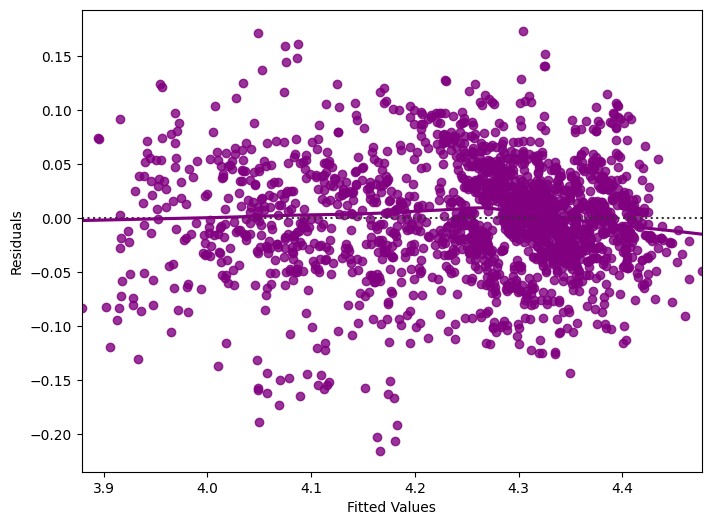

In [76]:
# Plotting fitted values vs residuals

plt.figure(figsize = (8, 6))
sns.residplot(data = df_pred, x = 'Fitted Values', y = 'Residuals', lowess = True, color = 'purple')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**Observations:**
* The data points and the LOWESS line do not show a clear pattern between the fitted values and residuals.

* The residuals are concentrated close to zero, which indicates that the model’s predictions are generally accurate.

* The assumptions of linearity and independence are satisfied.

### Test for Normality

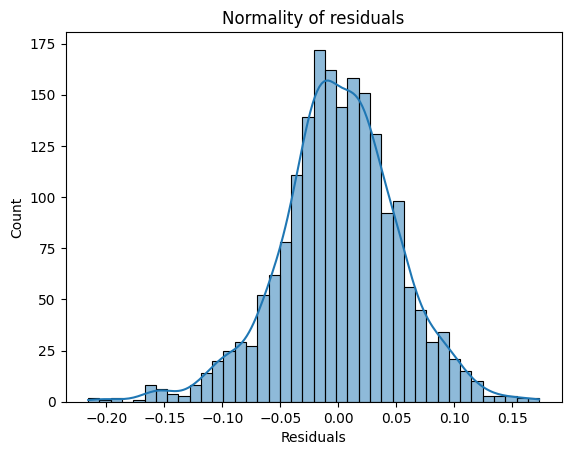

In [77]:
# Residual distribution
sns.histplot(data = df_pred, x = "Residuals", kde = True)
plt.title("Normality of residuals")
plt.show()

**Observations:**
* The distribution is of residuals is not perfectly symmetric, but it shows distribution close to normal distribution.

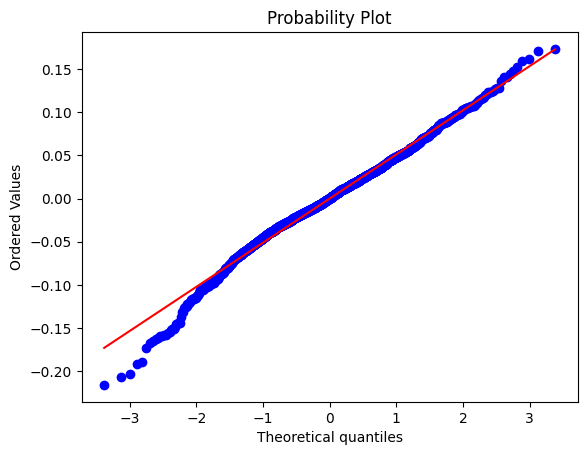

In [78]:
## QQ-plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations:**
- The residuals are more or less follow a straight line except for the bottom tail.

In [79]:
# Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9895409511621699), pvalue=np.float64(1.4374634686127138e-10))

**Observations:**
* Since p-value < 0.05, the residuals are not normal.
* Judging by the eivdence shown, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied.

### Test for Homoscedasticity

In [80]:
# Goldfeldquandt test
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', np.float64(0.9987054458574317)),
 ('p-value', np.float64(0.5079297125296083))]

* Since p-value > 0.05, the residuals are homoscedastic.
* All the linear regression assumptions are satisfied.

### Final Model

In [81]:
X_train_final = X_train4.copy()
X_test_final = X_test4.copy()
y_train_final = y_train1.copy()
y_test_final = y_test1.copy()

In [82]:
olsmod_final = sm.OLS(y_train_final, X_train_final).fit()
print(olsmod_final.summary())

                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     770.1
Date:                Tue, 17 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:06:03   Log-Likelihood:                 2983.4
No. Observations:                1923   AIC:                            -5937.
Df Residuals:                    1908   BIC:                            -5853.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [83]:
# Comparing the training and test performance of final model
olsmod_final_train_perf = model_performance_checker(olsmod_final, X_train_final, y_train_final)
olsmod_final_test_perf = model_performance_checker(olsmod_final, X_test_final, y_test_final)

print('Training Performance:\n', olsmod_final_train_perf)
print('-' * 51)
print('Test Performance:\n', olsmod_final_test_perf)

Training Performance:
      RMSE     MAE  R-Squared  Adj R-Squared    MAPE
0 0.05128 0.03929    0.84964        0.84846 0.93005
---------------------------------------------------
Test Performance:
      RMSE     MAE  R-Squared  Adj R-Squared    MAPE
0 0.04759 0.03625    0.87241        0.87005 0.85934


## Conclusions & Insights

#### Key Interpretations:

* Adult Mortality and Infant Deaths have negative coefficients, suggesting that higher mortality rates are associated with lower life expectancy.

  * A unit increase in Adult Mortality is associated with a 1.39% decrease in life expectancy.
  * Similarly, an increase in Infant Deaths lowers life expectancy by approximately 1% per unit.

* HIV/AIDS has the strongest negative impact on life expectancy, with a coefficient of -0.0880, indicating that higher HIV prevalence substantially reduces life expectancy.

* Income Composition of Resources (coef: 0.1470) and Schooling (coef: 0.0080) are strong positive predictors. Countries with better income equality and education tend to have longer life expectancy.

* GDP (coef: 0.0027) also contributes positively, but smaller than the previous features.

* Vaccination coverage, including Polio, Diphtheria, and Total Health Expenditure, all show statistically significant positive effects, supporting the importance of immunization programs and public health investment.

* The Status_Developing dummy variable is negative (-0.0119) and significant, implying that developing countries still tend to have slightly lower life expectancy.

---

### Final Insights:

The results show that life expectancy is mainly affected by health conditions, education, income, and access to healthcare. Countries with lower HIV rates, better education, higher income, and strong vaccination programs tend to have longer life expectancy. Improving these areas, especially in developing countries, can help people live longer and healthier lives.